In [ ]:
 import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("Classification dataset.csv")
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [ ]:
data.shape

(45211, 11)

In [ ]:
data.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [ ]:
data.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [ ]:
from numpy.lib.arraysetops import unique
cat_cols=['job','marital','education_qual','call_type',"mon",'prev_outcome','y']
for column in cat_cols:
   # col=data.columns
  unique_types=data[column].value_counts()
  print("\nIndividual Counts of ",column,": ",unique_types)


Individual Counts of  job :  blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Individual Counts of  marital :  married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Individual Counts of  education_qual :  secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64

Individual Counts of  call_type :  cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

Individual Counts of  mon :  may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

Individual Counts of  prev_outcome :  unknown    36959
failure     4901
other   

In [ ]:
data.duplicated().sum()

6

In [ ]:
data[data.duplicated()]

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
6893,34,services,married,secondary,unknown,28,may,124,1,unknown,no
8138,29,admin.,single,secondary,unknown,2,jun,121,4,unknown,no
11630,39,blue-collar,married,primary,unknown,19,jun,112,4,unknown,no
13400,36,blue-collar,married,secondary,cellular,9,jul,183,1,unknown,no
19826,36,management,married,tertiary,cellular,8,aug,75,2,unknown,no
19854,32,technician,single,tertiary,cellular,8,aug,31,2,unknown,no


In [ ]:
data=data.drop_duplicates()

In [ ]:
data.shape

(45205, 11)

# **Data Cleaning** **& EDA**

--- 



In [ ]:
data.y=data.y.map({'yes':1,'no':0})

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
data.sample(7)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
33803,72,retired,married,primary,cellular,24,apr,384,2,unknown,1
32671,34,technician,single,tertiary,cellular,17,apr,158,2,unknown,0
15535,47,technician,married,tertiary,cellular,21,jul,212,7,unknown,0
27009,38,services,married,secondary,cellular,21,nov,152,2,unknown,0
27879,44,admin.,married,primary,cellular,28,jan,273,1,unknown,0
10710,46,housemaid,married,unknown,unknown,16,jun,703,1,unknown,0
42843,64,housemaid,married,unknown,telephone,3,feb,219,2,unknown,1


## 1. Age column

In [ ]:
# Checking for null values
data['age'].isnull().sum()

0

<AxesSubplot:xlabel='age'>

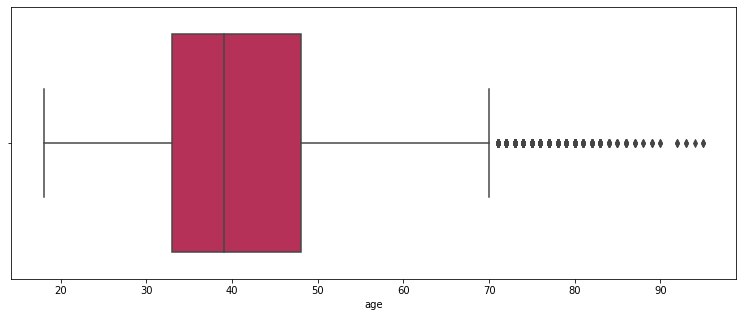

In [ ]:
plt.figure(figsize=(13,5))
sns.boxplot(data=data,x='age',palette='rocket')

Ther are outliers !!

In [ ]:
def outlier(feature):  # Method to detect and correct outliers
  
  # global abc
  iqr = data[feature].quantile(0.75)-data[feature].quantile(0.25)
  total=0
  upper_threshold=data[feature].quantile(0.75)+(1.5*iqr)
  lower_threshold=data[feature].quantile(0.25)-(1.5*iqr)
  print("U.Threshold: ",upper_threshold,"\nL.Threshold: ",lower_threshold)


  for i in data[feature][:]:
    if i>upper_threshold or i<lower_threshold:
      total+=1
      print("Outlier detected!: ",i)
      #data[feature] = data[feature].clip(lower_threshold,upper_threshold)


  return upper_threshold,lower_threshold,total

In [ ]:
a,b,c=outlier('age')
print("UTL: {}, LTL: {}, Total Outliers: {}".format(a,b,c))

U.Threshold:  70.5 
L.Threshold:  10.5
Outlier detected!:  83
Outlier detected!:  75
Outlier detected!:  75
Outlier detected!:  83
Outlier detected!:  75
Outlier detected!:  72
Outlier detected!:  71
Outlier detected!:  76
Outlier detected!:  83
Outlier detected!:  71
Outlier detected!:  85
Outlier detected!:  72
Outlier detected!:  90
Outlier detected!:  71
Outlier detected!:  82
Outlier detected!:  73
Outlier detected!:  74
Outlier detected!:  71
Outlier detected!:  75
Outlier detected!:  78
Outlier detected!:  85
Outlier detected!:  80
Outlier detected!:  71
Outlier detected!:  78
Outlier detected!:  73
Outlier detected!:  75
Outlier detected!:  94
Outlier detected!:  72
Outlier detected!:  83
Outlier detected!:  79
Outlier detected!:  78
Outlier detected!:  83
Outlier detected!:  73
Outlier detected!:  76
Outlier detected!:  83
Outlier detected!:  77
Outlier detected!:  73
Outlier detected!:  74
Outlier detected!:  73
Outlier detected!:  77
Outlier detected!:  71
Outlier detected!:

There are 487 outliers in the age column.

UTL = 70.5 

LTL = 10.5

In [ ]:
age=data[['age','y']]
age_converted=age.query('y==1').shape[0]

In [ ]:
total_conversion_rate_age=(age_converted/data.shape[0])*100
total_conversion_rate_age

11.700033182170113

In [ ]:
age_outliers_converted=data.query('age>70.5 and y==1')
age_outliers_converted

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
29865,75,retired,divorced,primary,cellular,4,feb,136,3,unknown,1
31055,85,retired,married,primary,telephone,12,feb,165,2,unknown,1
31057,72,retired,married,tertiary,cellular,13,feb,99,1,unknown,1
31069,90,retired,divorced,secondary,cellular,13,feb,152,3,unknown,1
31077,71,retired,married,primary,cellular,16,feb,93,5,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
45109,78,management,married,unknown,cellular,25,oct,211,2,success,1
45191,75,retired,divorced,tertiary,cellular,16,nov,262,1,failure,1
45204,73,retired,married,secondary,cellular,17,nov,300,1,failure,1
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,1


In [ ]:
conversion_rate_in_age_outliers=(age_outliers_converted.shape[0]/487)*100
conversion_rate_in_age_outliers

44.76386036960985

Conversion rate in the ***outliers of age*** column is 44.7%, where as in the ***age*** column it is 11.7% only. This is in line of our G.K. that old age people are more likely to subscribe to a policy.

Text(0.5, 1.0, 'Histogram of Probability of Conversion in Age')

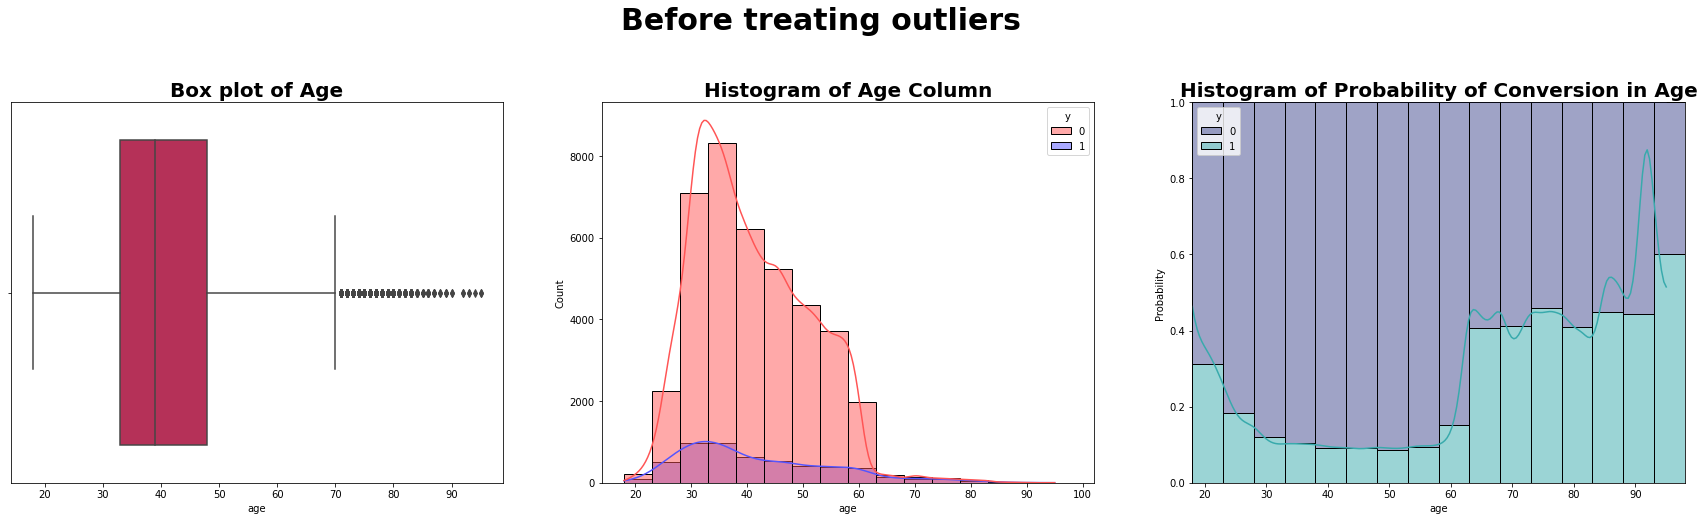

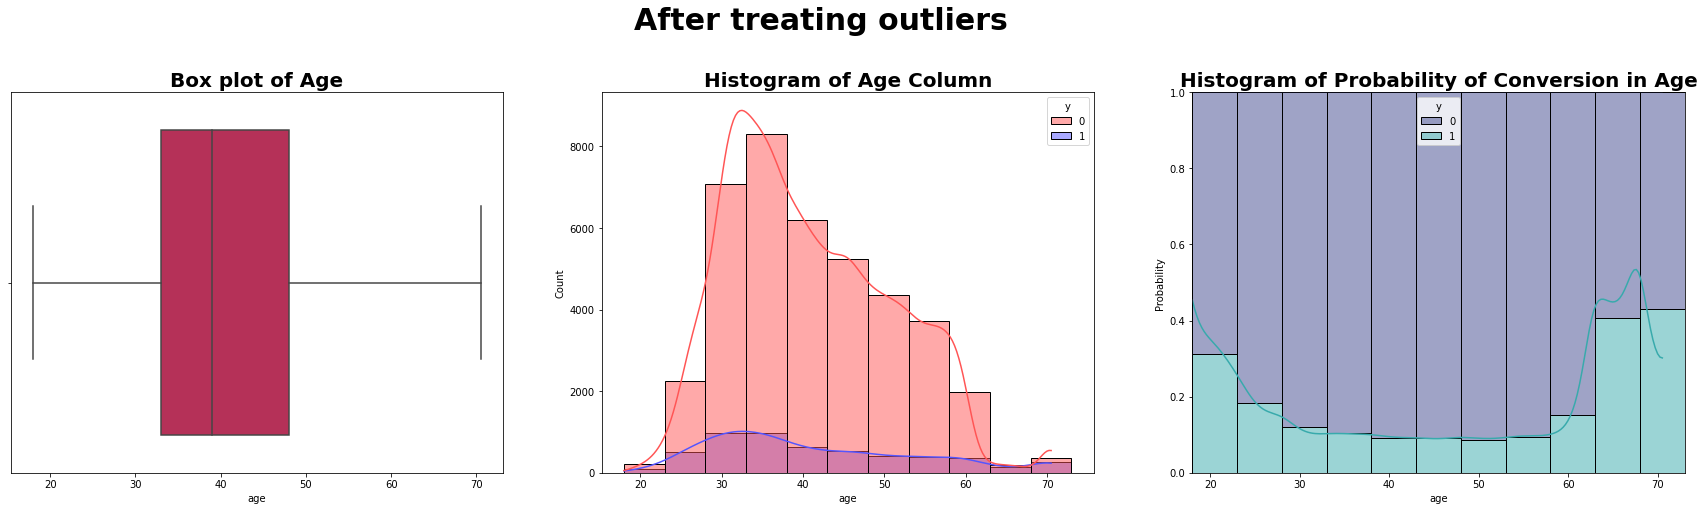

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(30,7))

plt.suptitle("Before treating outliers",y=1.07,fontweight='heavy',fontsize=30)

sns.boxplot(data=data,x='age',palette='rocket',ax=axes[0]).set_title("Box plot of Age",fontweight='bold',fontsize=20)
sns.histplot(data=data,x=data['age'],hue='y',palette='seismic_r',binwidth=5,kde=True,ax=axes[1]).set_title("Histogram of Age Column",fontweight='bold',fontsize=20)
sns.histplot(data=data,x=data['age'],hue='y',palette='mako',binwidth=5,kde=True,ax=axes[2],multiple='fill',stat='probability').set_title("Histogram of Probability of Conversion in Age",fontweight='bold',fontsize=20 )

data['age'] = data['age'].clip(10.5,70.5) # Clipping the outliers

fig2,axes2=plt.subplots(1,3,figsize=(30,7))
plt.suptitle("After treating outliers",y=1.05,fontweight='heavy',fontsize=30)
sns.boxplot(data=data,x='age',palette='rocket',ax=axes2[0]).set_title("Box plot of Age",fontweight='bold',fontsize=20)
sns.histplot(data=data,x=data['age'],hue='y',palette='seismic_r',binwidth=5,kde=True,ax=axes2[1]).set_title("Histogram of Age Column",fontweight='bold',fontsize=20)
sns.histplot(data=data,x=data['age'],hue='y',palette='mako',binwidth=5,kde=True,ax=axes2[2],multiple='fill',stat='probability').set_title("Histogram of Probability of Conversion in Age",fontweight='bold',fontsize=20 )



From the above plots, though the count for age group 30 to 40 is high,probability of conversion is very low(around 0.1). Also for the age group 20 and 25 the probability of conversion lies in between 0.2 to 0.3 only. The businees firm has good scope in this age group to convert them to take a policy

## 2. Job column

In [ ]:
data['job'].value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

**Univariation**

<AxesSubplot:xlabel='job', ylabel='count'>

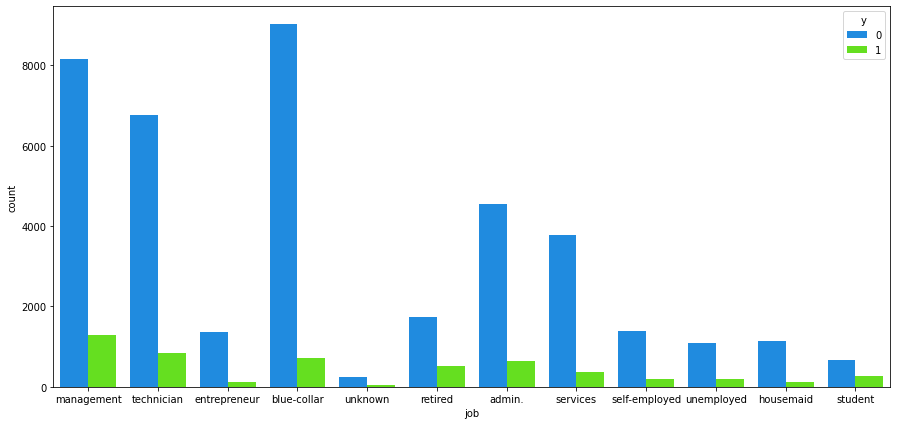

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data=data,x='job',hue='y',palette='gist_rainbow_r')

In [ ]:
jobs=pd.pivot_table(data=data,values='y',index='job').sort_values(by='y')
jobs['y']=jobs['y']*100
jobs

,y
job,
blue-collar,7.276465
entrepreneur,8.271688
housemaid,8.790323
services,8.885143
technician,11.058452
unknown,11.805556
self-employed,11.842939
admin.,12.205029
management,13.757005


In [ ]:
jobs.index

Index(['blue-collar', 'entrepreneur', 'housemaid', 'services', 'technician',
       'unknown', 'self-employed', 'admin.', 'management', 'unemployed',
       'retired', 'student'],
      dtype='object', name='job')

**Bi-variation**

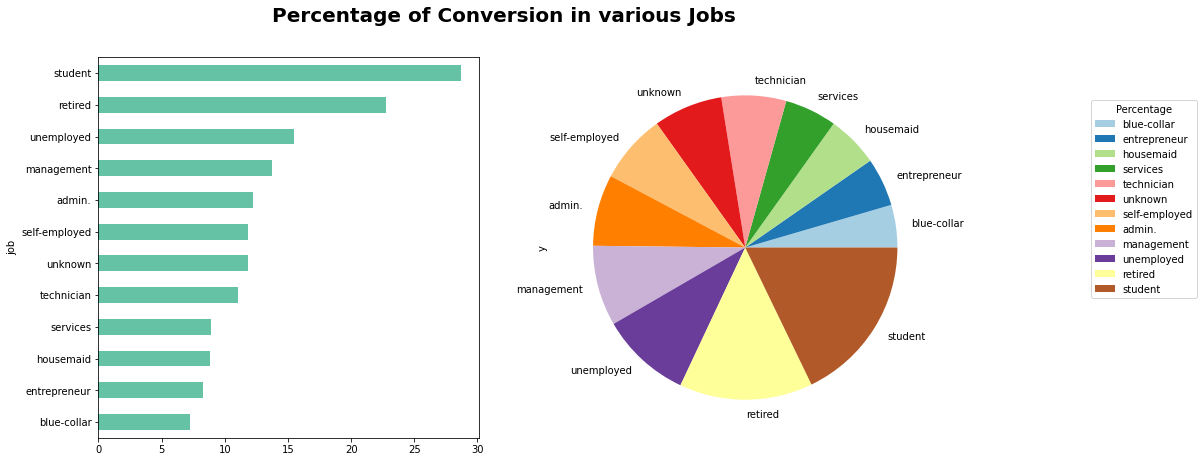

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(15,7))
plt.suptitle("Percentage of Conversion in various Jobs",fontweight='bold',fontsize=20)


jobs.plot(kind='barh',ax=axes[0],legend=None,cmap='Set2')
jobs.plot(kind='pie',subplots=True,ax=axes[1],cmap="Paired")
plt.legend(loc='upper right',bbox_to_anchor=(1.7,0.9),title='Percentage')


([], [])

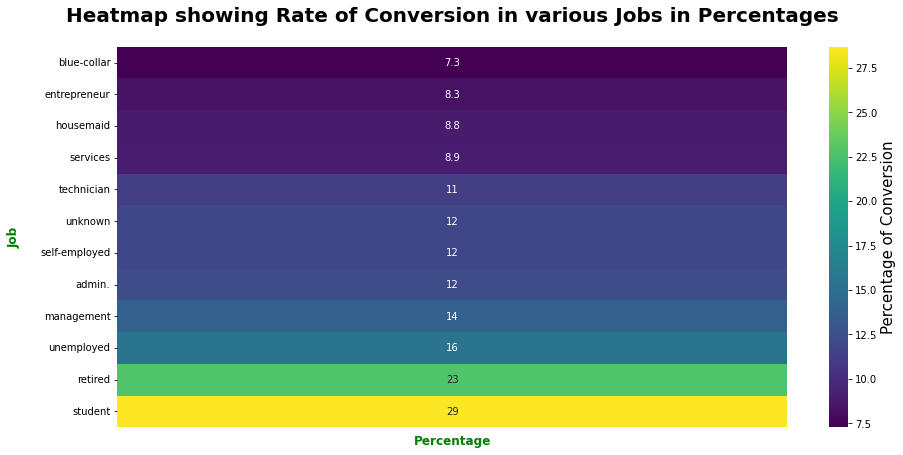

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(data=jobs,annot=True,cmap='viridis',cbar_kws={'label':"Percentage of Conversion"}).figure.axes[-1].yaxis.label.set_size(15)
plt.title("Heatmap showing Rate of Conversion in various Jobs in Percentages",fontsize=20,fontweight='bold',pad=25)
plt.xlabel("Percentage",fontsize=12,fontweight='bold',color='green')
plt.ylabel("Job",fontsize=12,labelpad=20,fontweight='bold',color='green')
plt.xticks([])


In [ ]:
# Jobs=data.groupby('job')['y'].mean().sort_values()
# Jobs.reset_index()

**Multi-variation**

Text(0.5, 0, 'Duration')

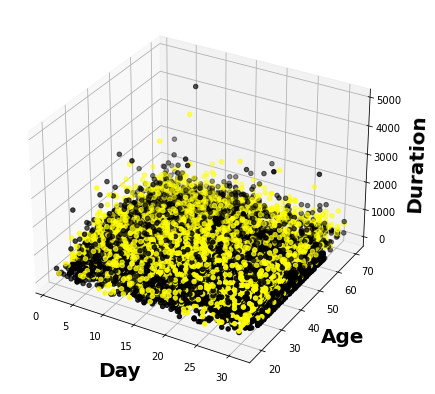

In [ ]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
ax = plt.axes(projection ='3d')

y=data['age']
z=data['dur']
x=data['day']
c=data['y']

ax.scatter(x,y,z,c=c,cmap='gnuplot')

plt.xlabel("Day",fontweight='bold',fontsize=20,labelpad=10)
plt.ylabel("Age",fontweight='bold',fontsize=20,labelpad=10)
ax.set_zlabel("Duration",fontweight='bold',fontsize=20,labelpad=10)



Couldn't able to draw any inference from the above 3D plot 😥

In [ ]:
jobs_N_marital=data.pivot_table(index='marital',columns='job',values='y')
jobs_N_marital

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
marital,,,,,,,,,,,,
divorced,0.120000,0.077333,0.083799,0.097826,0.127813,0.284706,0.157143,0.091075,0.166667,0.083243,0.157895,0.058824
married,0.113628,0.062733,0.075701,0.073465,0.126134,0.220682,0.079557,0.073982,0.185185,0.102665,0.132695,0.103448
single,0.136074,0.105760,0.113445,0.166667,0.162199,0.120370,0.192825,0.117696,0.293850,0.132493,0.194514,0.176471


In [ ]:
jobs_N_marital=jobs_N_marital.apply(lambda x: x*100)
jobs_N_marital


job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
marital,,,,,,,,,,,,
divorced,12.000000,7.733333,8.379888,9.782609,12.781278,28.470588,15.714286,9.107468,16.666667,8.324324,15.789474,5.882353
married,11.362792,6.273328,7.570093,7.346491,12.613447,22.068169,7.955690,7.398171,18.518519,10.266535,13.269494,10.344828
single,13.607412,10.575968,11.344538,16.666667,16.219885,12.037037,19.282511,11.769616,29.384966,13.249332,19.451372,17.647059


(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'divorced'), Text(0, 1.5, 'married'), Text(0, 2.5, 'single')])

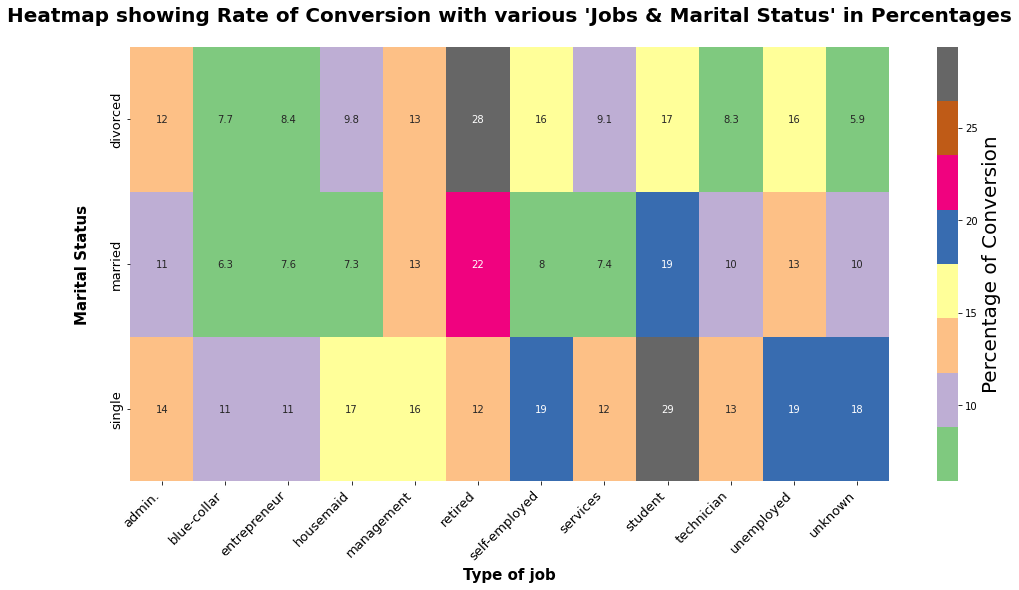

In [ ]:
plt.figure(figsize=(17,8))

sns.heatmap(data=jobs_N_marital,annot=True,cmap='Accent',cbar_kws={'label':"Percentage of Conversion"}).figure.axes[-1].yaxis.label.set_size(20)
plt.title("Heatmap showing Rate of Conversion with various 'Jobs & Marital Status' in Percentages",fontsize=20,fontweight='bold',pad=25)

plt.xlabel("Type of job",fontsize=15,fontweight='bold',labelpad=5)
plt.xticks(fontsize=13,rotation=45,ha='right')
plt.ylabel("Marital Status",fontsize=15,fontweight='bold',labelpad=20)
plt.yticks(fontsize=13)

In [ ]:
jobs_N_qualification=data.pivot_table(index='education_qual',columns='job',values='y')
jobs_N_qualification

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
education_qual,,,,,,,,,,,,
primary,0.057416,0.058025,0.065574,0.078150,0.074830,0.223899,0.038462,0.084058,0.363636,0.082278,0.132296,0.058824
secondary,0.119014,0.080633,0.095941,0.086076,0.086530,0.210366,0.074523,0.085648,0.297244,0.099063,0.148352,0.126761
tertiary,0.173077,0.161074,0.075802,0.127168,0.145385,0.275956,0.160864,0.123762,0.264574,0.145399,0.193772,0.102564
unknown,0.105263,0.072687,0.092105,0.088889,0.198347,0.252101,0.128205,0.126667,0.263804,0.095041,0.137931,0.141732


In [ ]:
jobs_N_qualification=jobs_N_qualification.apply(lambda x: x*100)
jobs_N_qualification

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
education_qual,,,,,,,,,,,,
primary,5.741627,5.802502,6.557377,7.814992,7.482993,22.389937,3.846154,8.405797,36.363636,8.227848,13.229572,5.882353
secondary,11.901375,8.063315,9.594096,8.607595,8.652988,21.036585,7.452340,8.564815,29.724409,9.906292,14.835165,12.676056
tertiary,17.307692,16.107383,7.580175,12.716763,14.538462,27.595628,16.086435,12.376238,26.457399,14.539908,19.377163,10.256410
unknown,10.526316,7.268722,9.210526,8.888889,19.834711,25.210084,12.820513,12.666667,26.380368,9.504132,13.793103,14.173228


(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'primary'),
  Text(0, 1.5, 'secondary'),
  Text(0, 2.5, 'tertiary'),
  Text(0, 3.5, 'unknown')])

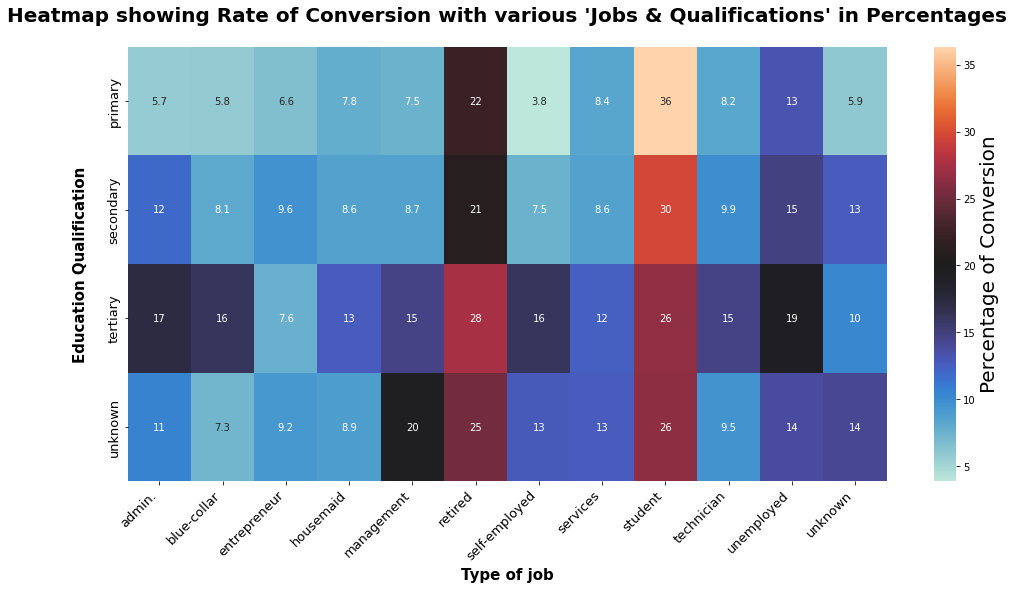

In [ ]:
plt.figure(figsize=(17,8))

sns.heatmap(data=jobs_N_qualification,annot=True,cmap='icefire',cbar_kws={'label':"Percentage of Conversion"}).figure.axes[-1].yaxis.label.set_size(20)
plt.title("Heatmap showing Rate of Conversion with various 'Jobs & Qualifications' in Percentages",fontsize=20,fontweight='bold',pad=25)

plt.xlabel("Type of job",fontsize=15,fontweight='bold',labelpad=5)
plt.xticks(fontsize=13,rotation=45,ha='right')
plt.ylabel("Education Qualification",fontsize=15,fontweight='bold',labelpad=20)
plt.yticks(fontsize=13)


In [ ]:
jobs_N_calltype=data.pivot_table(index='call_type',columns='job',values='y')
jobs_N_calltype

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
call_type,,,,,,,,,,,,
cellular,0.157722,0.099709,0.093291,0.112299,0.164387,0.267153,0.141144,0.121297,0.352941,0.135874,0.194164,0.206107
telephone,0.141869,0.062193,0.183908,0.092715,0.127389,0.318519,0.122449,0.070175,0.191919,0.084112,0.130000,0.108696
unknown,0.039948,0.039354,0.040359,0.032258,0.044252,0.042945,0.055416,0.035039,0.028169,0.043272,0.051282,0.018018


In [ ]:
jobs_N_calltype=jobs_N_calltype.apply(lambda x: x*100)
jobs_N_calltype


job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
call_type,,,,,,,,,,,,
cellular,15.772212,9.970902,9.329140,11.229947,16.438746,26.715328,14.114391,12.129704,35.294118,13.587361,19.416386,20.610687
telephone,14.186851,6.219313,18.390805,9.271523,12.738854,31.851852,12.244898,7.017544,19.191919,8.411215,13.000000,10.869565
unknown,3.994761,3.935419,4.035874,3.225806,4.425229,4.294479,5.541562,3.503854,2.816901,4.327177,5.128205,1.801802


(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'cellular'),
  Text(0, 1.5, 'telephone'),
  Text(0, 2.5, 'unknown')])

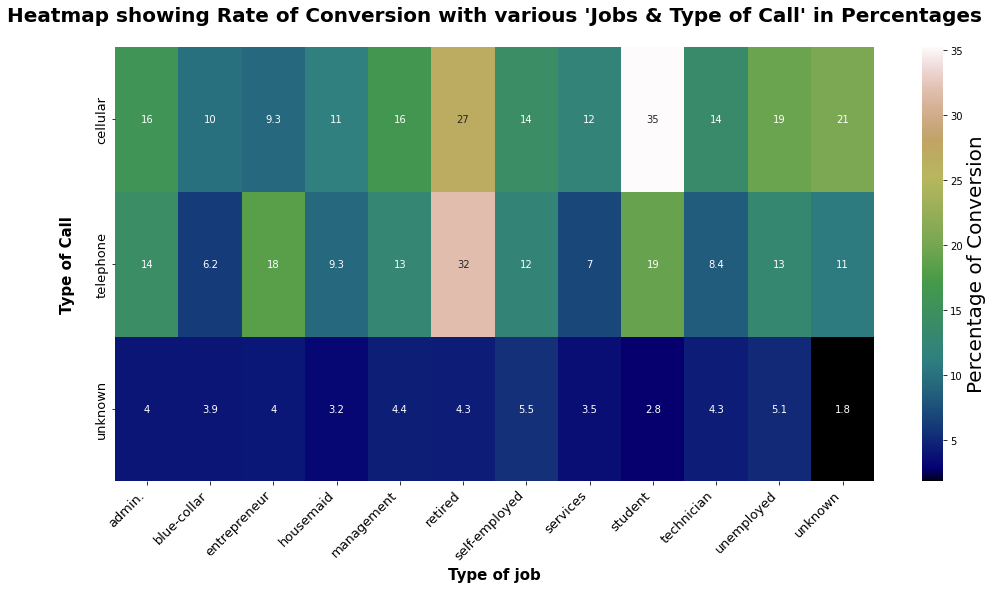

In [ ]:
plt.figure(figsize=(17,8))

sns.heatmap(data=jobs_N_calltype,annot=True,cmap='gist_earth',cbar_kws={'label':"Percentage of Conversion"}).figure.axes[-1].yaxis.label.set_size(20)
plt.title("Heatmap showing Rate of Conversion with various 'Jobs & Type of Call' in Percentages",fontsize=20,fontweight='bold',pad=25)

plt.xlabel("Type of job",fontsize=15,fontweight='bold',labelpad=5)
plt.xticks(fontsize=13,rotation=45,ha='right')
plt.ylabel("Type of Call",fontsize=15,fontweight='bold',labelpad=20)
plt.yticks(fontsize=13)

In [ ]:
jobs_N_month=data.pivot_table(index='job',columns='mon',values='y')
jobs_N_month

mon,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
job,,,,,,,,,,,,
admin.,0.168317,0.168975,0.521739,0.156051,0.112360,0.079219,0.123939,0.418919,0.075957,0.099526,0.352381,0.461538
blue-collar,0.102258,0.098522,0.416667,0.079404,0.059459,0.081004,0.069586,0.416667,0.051850,0.076412,0.355932,0.548387
entrepreneur,0.128571,0.134146,0.333333,0.114943,0.052632,0.096026,0.060185,1.000000,0.043269,0.068826,0.416667,0.500000
housemaid,0.196078,0.068966,0.333333,0.117647,0.062500,0.063830,0.051471,0.538462,0.072848,0.086420,0.384615,0.285714
management,0.276173,0.106727,0.490196,0.201802,0.072414,0.088083,0.145946,0.576389,0.077952,0.094891,0.474576,0.502959
retired,0.337931,0.168798,0.512195,0.363095,0.269663,0.144543,0.118812,0.560606,0.121469,0.255474,0.373134,0.463918
self-employed,0.267442,0.112676,0.333333,0.123810,0.094340,0.085020,0.107981,0.562500,0.073770,0.093617,0.538462,0.307692
services,0.100000,0.112360,0.533333,0.085714,0.096296,0.076031,0.088975,0.700000,0.061674,0.092409,0.650000,0.666667
student,0.382022,0.300000,0.411765,0.333333,0.205128,0.416667,0.211765,0.384615,0.142292,0.365385,0.512821,0.360000


In [ ]:
jobs_N_month=jobs_N_month.apply(lambda x: x*100)
jobs_N_month

mon,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
job,,,,,,,,,,,,
admin.,16.831683,16.897507,52.173913,15.605096,11.235955,7.921929,12.393888,41.891892,7.595660,9.952607,35.238095,46.153846
blue-collar,10.225764,9.852217,41.666667,7.940447,5.945946,8.100358,6.958561,41.666667,5.185016,7.641196,35.593220,54.838710
entrepreneur,12.857143,13.414634,33.333333,11.494253,5.263158,9.602649,6.018519,100.000000,4.326923,6.882591,41.666667,50.000000
housemaid,19.607843,6.896552,33.333333,11.764706,6.250000,6.382979,5.147059,53.846154,7.284768,8.641975,38.461538,28.571429
management,27.617329,10.672736,49.019608,20.180180,7.241379,8.808290,14.594595,57.638889,7.795203,9.489051,47.457627,50.295858
retired,33.793103,16.879795,51.219512,36.309524,26.966292,14.454277,11.881188,56.060606,12.146893,25.547445,37.313433,46.391753
self-employed,26.744186,11.267606,33.333333,12.380952,9.433962,8.502024,10.798122,56.250000,7.377049,9.361702,53.846154,30.769231
services,10.000000,11.235955,53.333333,8.571429,9.629630,7.603093,8.897485,70.000000,6.167401,9.240924,65.000000,66.666667
student,38.202247,30.000000,41.176471,33.333333,20.512821,41.666667,21.176471,38.461538,14.229249,36.538462,51.282051,36.000000


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0, 0.5, 'admin.'),
  Text(0, 1.5, 'blue-collar'),
  Text(0, 2.5, 'entrepreneur'),
  Text(0, 3.5, 'housemaid'),
  Text(0, 4.5, 'management'),
  Text(0, 5.5, 'retired'),
  Text(0, 6.5, 'self-employed'),
  Text(0, 7.5, 'services'),
  Text(0, 8.5, 'student'),
  Text(0, 9.5, 'technician'),
  Text(0, 10.5, 'unemployed'),
  Text(0, 11.5, 'unknown')])

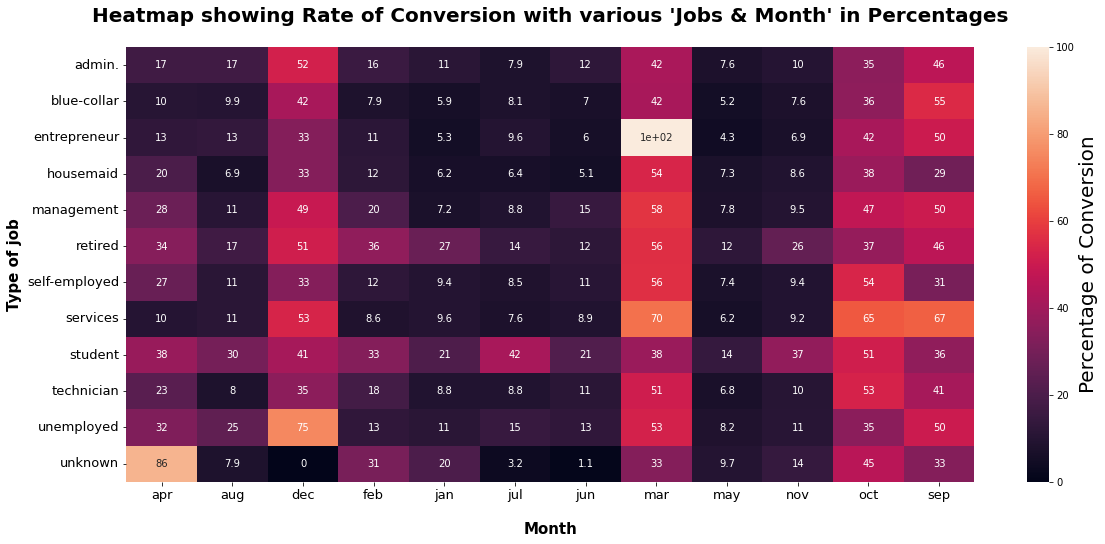

In [ ]:
plt.figure(figsize=(19,8))

sns.heatmap(data=jobs_N_month,annot=True,cbar_kws={'label':"Percentage of Conversion"}).figure.axes[-1].yaxis.label.set_size(20)
plt.title("Heatmap showing Rate of Conversion with various 'Jobs & Month' in Percentages",fontsize=20,fontweight='bold',pad=25)

plt.ylabel("Type of job",fontsize=15,fontweight='bold',labelpad=5)
plt.xticks(fontsize=13)
plt.xlabel("Month",fontsize=15,fontweight='bold',labelpad=20)
plt.yticks(fontsize=13)

In [ ]:
jobs_N_previousOutcome=data.pivot_table(index='prev_outcome',columns='job',values='y')
jobs_N_previousOutcome

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
prev_outcome,,,,,,,,,,,,
failure,0.133748,0.059925,0.091463,0.134021,0.160920,0.221739,0.096970,0.094595,0.290598,0.124216,0.214286,0.300000
other,0.165975,0.087282,0.076923,0.153846,0.223919,0.349398,0.213115,0.101695,0.283951,0.150502,0.216216,0.500000
success,0.598039,0.574324,0.409091,0.586207,0.687339,0.718391,0.654545,0.694118,0.712644,0.563265,0.781250,0.818182
unknown,0.093827,0.064588,0.076070,0.068934,0.102057,0.175014,0.093991,0.072527,0.229709,0.089209,0.110092,0.070588


In [ ]:
jobs_N_previousOutcome=jobs_N_previousOutcome.apply(lambda x: x*100)
jobs_N_previousOutcome

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
prev_outcome,,,,,,,,,,,,
failure,13.374806,5.992509,9.146341,13.402062,16.091954,22.173913,9.696970,9.459459,29.059829,12.421581,21.428571,30.000000
other,16.597510,8.728180,7.692308,15.384615,22.391858,34.939759,21.311475,10.169492,28.395062,15.050167,21.621622,50.000000
success,59.803922,57.432432,40.909091,58.620690,68.733850,71.839080,65.454545,69.411765,71.264368,56.326531,78.125000,81.818182
unknown,9.382656,6.458770,7.606973,6.893382,10.205686,17.501407,9.399076,7.252683,22.970904,8.920863,11.009174,7.058824


(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'failure'),
  Text(0, 1.5, 'other'),
  Text(0, 2.5, 'success'),
  Text(0, 3.5, 'unknown')])

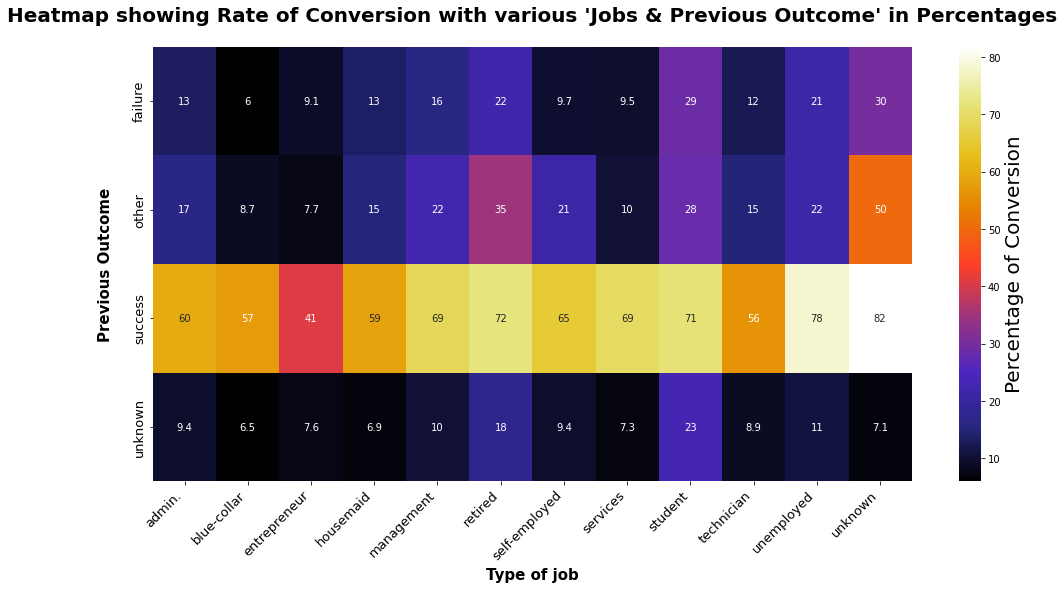

In [ ]:
plt.figure(figsize=(17,8))

sns.heatmap(data=jobs_N_previousOutcome,annot=True,cmap='CMRmap',cbar_kws={'label':"Percentage of Conversion"}).figure.axes[-1].yaxis.label.set_size(20)
plt.title("Heatmap showing Rate of Conversion with various 'Jobs & Previous Outcome' in Percentages",fontsize=20,fontweight='bold',pad=25)

plt.xlabel("Type of job",fontsize=15,fontweight='bold',labelpad=5)
plt.xticks(fontsize=13,rotation=45,ha='right')
plt.ylabel("Previous Outcome",fontsize=15,fontweight='bold',labelpad=20)
plt.yticks(fontsize=13)

## 6. Day Column

In [ ]:
# Checking for null values
data['day'].isnull().sum()

0

<AxesSubplot:xlabel='day'>

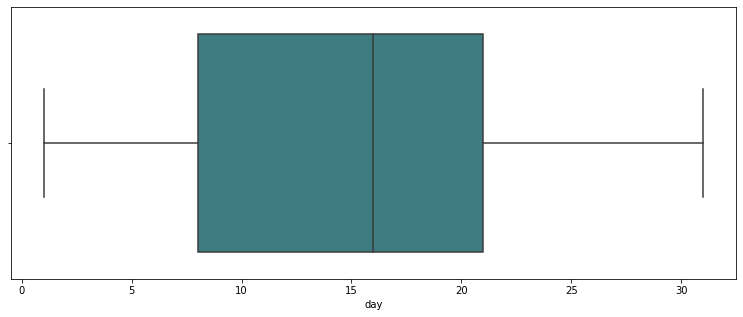

In [ ]:
plt.figure(figsize=(13,5))
sns.boxplot(data=data,x='day',palette='crest')

There are no outliers.

Text(0.5, 1.0, 'Histogram of Probability of Conversion in Day')

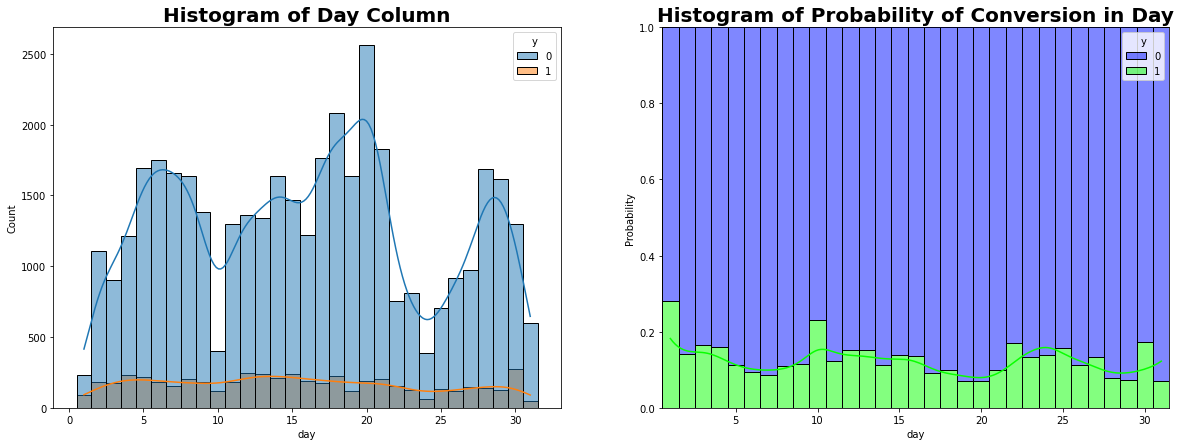

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(20,7))

sns.histplot(data=data,x=data['day'],hue='y', binwidth=1,kde=True,ax=axes[0],discrete=True).set_title("Histogram of Day Column",fontweight='bold',fontsize=20)
sns.histplot(data=data,x=data['day'],hue='y',palette='hsv_r',binwidth=1 ,kde=True,ax=axes[1],multiple='fill',stat='probability',discrete=True).set_title("Histogram of Probability of Conversion in Day",fontweight='bold',fontsize=20 )

## 8. Duration column

In [ ]:
data.dur.isnull().sum()


0

<AxesSubplot:xlabel='dur'>

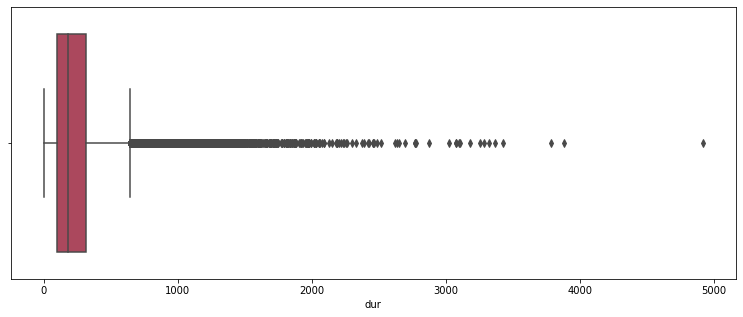

In [ ]:
plt.figure(figsize=(13,5))
sns.boxplot(data=data,x='dur',palette='inferno')

In [ ]:
i,j,k=outlier('dur')
print("UTL: {}, LTL: {}, Total Outliers: {}".format(i,j,k))

U.Threshold:  643.0 
L.Threshold:  -221.0
Outlier detected!:  1666
Outlier detected!:  1492
Outlier detected!:  787
Outlier detected!:  1778
Outlier detected!:  812
Outlier detected!:  1042
Outlier detected!:  1467
Outlier detected!:  1389
Outlier detected!:  849
Outlier detected!:  677
Outlier detected!:  2033
Outlier detected!:  673
Outlier detected!:  1056
Outlier detected!:  717
Outlier detected!:  683
Outlier detected!:  1077
Outlier detected!:  1419
Outlier detected!:  730
Outlier detected!:  746
Outlier detected!:  702
Outlier detected!:  714
Outlier detected!:  962
Outlier detected!:  742
Outlier detected!:  669
Outlier detected!:  680
Outlier detected!:  808
Outlier detected!:  652
Outlier detected!:  1201
Outlier detected!:  1030
Outlier detected!:  769
Outlier detected!:  673
Outlier detected!:  744
Outlier detected!:  765
Outlier detected!:  1623
Outlier detected!:  678
Outlier detected!:  699
Outlier detected!:  1677
Outlier detected!:  918
Outlier detected!:  1297
Outlier

There are 3235 outliers in ***'duration'*** column!

*  Upper threshold = 643 seconds
*  Lower threshold = -221 seconds


In [ ]:
duration_outliers_converted=data.query('dur>643 and y==1')
duration_outliers_converted

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
83,59.0,admin.,married,secondary,unknown,5,may,1042,1,unknown,1
86,56.0,admin.,married,secondary,unknown,5,may,1467,1,unknown,1
87,41.0,technician,married,secondary,unknown,5,may,1389,1,unknown,1
168,54.0,admin.,married,tertiary,unknown,5,may,673,2,unknown,1
388,56.0,management,married,tertiary,unknown,6,may,1201,1,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
45085,25.0,technician,single,secondary,cellular,22,oct,716,3,unknown,1
45124,27.0,blue-collar,single,primary,cellular,26,oct,701,2,unknown,1
45200,38.0,technician,married,secondary,cellular,16,nov,1556,4,unknown,1
45206,51.0,technician,married,tertiary,cellular,17,nov,977,3,unknown,1


In [ ]:
conversion_rate_in_dur_outliers=(duration_outliers_converted.shape[0]/3235)*100
conversion_rate_in_dur_outliers

51.035548686244205

✍ Outliers in duration column have more conversion rate of 51% !!, where as total conversion rate of the entire dataset is only 11.7%.

Text(0.5, 1.0, 'Histogram of Probability of Conversion in Duration')

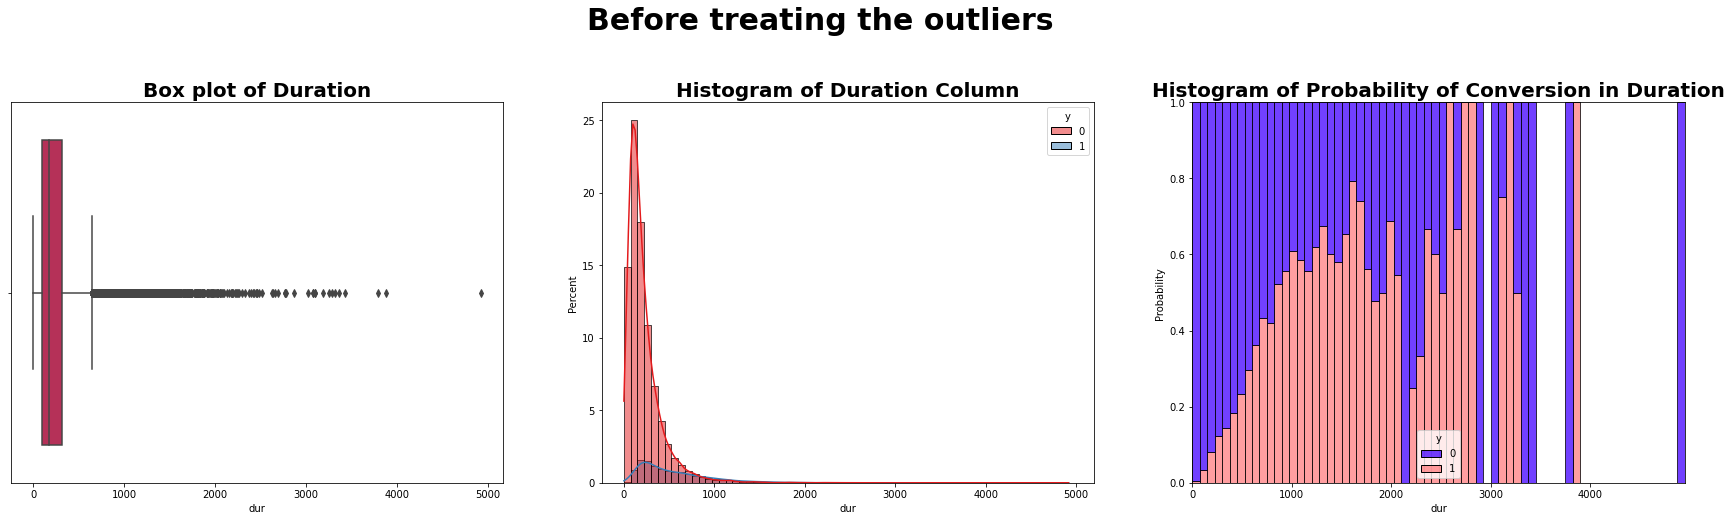

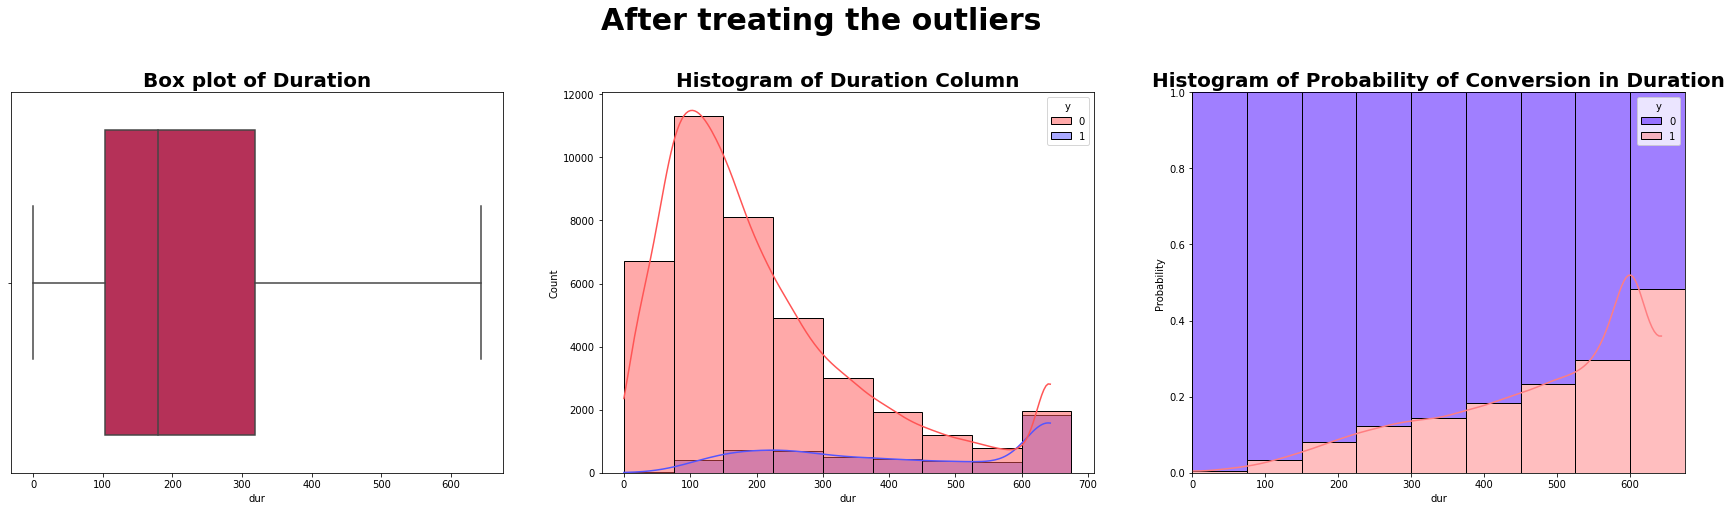

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(30,7))

plt.suptitle("Before treating the outliers",y=1.07,fontweight='heavy',fontsize=30)

sns.boxplot(data=data,x='dur',palette='rocket',ax=axes[0]).set_title("Box plot of Duration",fontweight='bold',fontsize=20)
sns.histplot(data=data,x=data['dur'],hue='y',palette='Set1',binwidth=75,kde=True,ax=axes[1],stat='percent').set_title("Histogram of Duration Column",fontweight='bold',fontsize=20)
sns.histplot(data=data,x=data['dur'],hue='y',palette='gnuplot2',binwidth=75,kde=False,ax=axes[2],multiple='fill',stat='probability').set_title("Histogram of Probability of Conversion in Duration",fontweight='bold',fontsize=20 )

data['dur'] = data['dur'].clip(-221,643) # Clipping the outliers

fig2,axes2=plt.subplots(1,3,figsize=(30,7))
plt.suptitle("After treating the outliers",y=1.05,fontweight='heavy',fontsize=30)
sns.boxplot(data=data,x='dur',palette='rocket',ax=axes2[0]).set_title("Box plot of Duration",fontweight='bold',fontsize=20)
sns.histplot(data=data,x=data['dur'],hue='y',palette='seismic_r',binwidth=75,kde=True,ax=axes2[1]).set_title("Histogram of Duration Column",fontweight='bold',fontsize=20)
sns.histplot(data=data,x=data['dur'],hue='y',palette='gnuplot2',binwidth=75,kde=True,ax=axes2[2],multiple='fill',stat='probability').set_title("Histogram of Probability of Conversion in Duration",fontweight='bold',fontsize=20 )



From the plots it is evident that as the duration increases conversion rate is increasing. 

## 9. Number of Calls column

In [ ]:
data.num_calls.isnull().sum()

0

<AxesSubplot:xlabel='num_calls'>

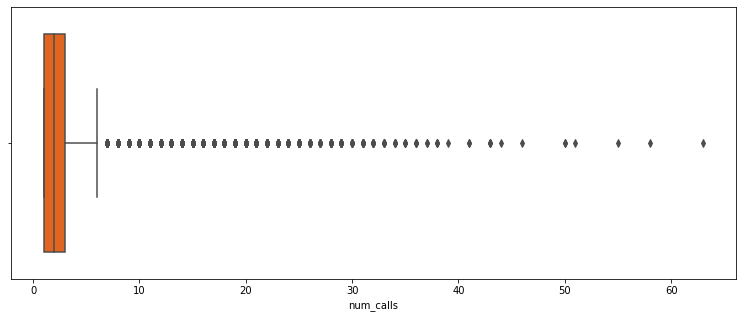

In [ ]:
plt.figure(figsize=(13,5))
sns.boxplot(data=data,x='num_calls',palette='hot')

In [ ]:
l,m,n=outlier('num_calls')
print("UTL: {}, LTL: {}, Total Outliers: {}".format(l,m,n))

U.Threshold:  6.0 
L.Threshold:  -2.0
Outlier detected!:  7
Outlier detected!:  8
Outlier detected!:  7
Outlier detected!:  8
Outlier detected!:  7
Outlier detected!:  8
Outlier detected!:  7
Outlier detected!:  7
Outlier detected!:  9
Outlier detected!:  9
Outlier detected!:  8
Outlier detected!:  8
Outlier detected!:  7
Outlier detected!:  9
Outlier detected!:  7
Outlier detected!:  9
Outlier detected!:  7
Outlier detected!:  7
Outlier detected!:  8
Outlier detected!:  9
Outlier detected!:  7
Outlier detected!:  8
Outlier detected!:  7
Outlier detected!:  7
Outlier detected!:  8
Outlier detected!:  8
Outlier detected!:  10
Outlier detected!:  11
Outlier detected!:  8
Outlier detected!:  7
Outlier detected!:  8
Outlier detected!:  7
Outlier detected!:  7
Outlier detected!:  7
Outlier detected!:  9
Outlier detected!:  8
Outlier detected!:  12
Outlier detected!:  9
Outlier detected!:  9
Outlier detected!:  8
Outlier detected!:  10
Outlier detected!:  13
Outlier detected!:  11
Outlier de

1. Total number of outliers = 3064
2. Upper threshold = 6
3. Lower threshold = -2
4. Max. value in the column = 63

In [ ]:
num_calls_outliers_converted=data.query('num_calls>6 & y==1')
num_calls_outliers_converted

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
3331,50.0,entrepreneur,married,primary,unknown,15,may,643,32,unknown,1
5236,35.0,blue-collar,married,primary,unknown,23,may,643,8,unknown,1
5705,44.0,technician,divorced,secondary,unknown,26,may,643,11,unknown,1
5973,30.0,services,married,secondary,unknown,26,may,643,7,unknown,1
7048,51.0,entrepreneur,married,unknown,unknown,28,may,560,9,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
44232,45.0,management,married,tertiary,cellular,19,jul,568,7,unknown,1
44337,25.0,services,single,unknown,cellular,29,jul,276,8,other,1
44583,24.0,student,single,secondary,cellular,19,aug,418,11,success,1
44770,37.0,services,single,tertiary,cellular,13,sep,323,9,other,1


In [ ]:
conversion_rate_in_numcalls_outliers=(num_calls_outliers_converted.shape[0]*100/3064)
conversion_rate_in_numcalls_outliers

5.254569190600522

The conversion rate with number of calls is 5.25% only

Text(0.5, 1.0, 'Histogram of Probability of Conversion in Number of Calls')

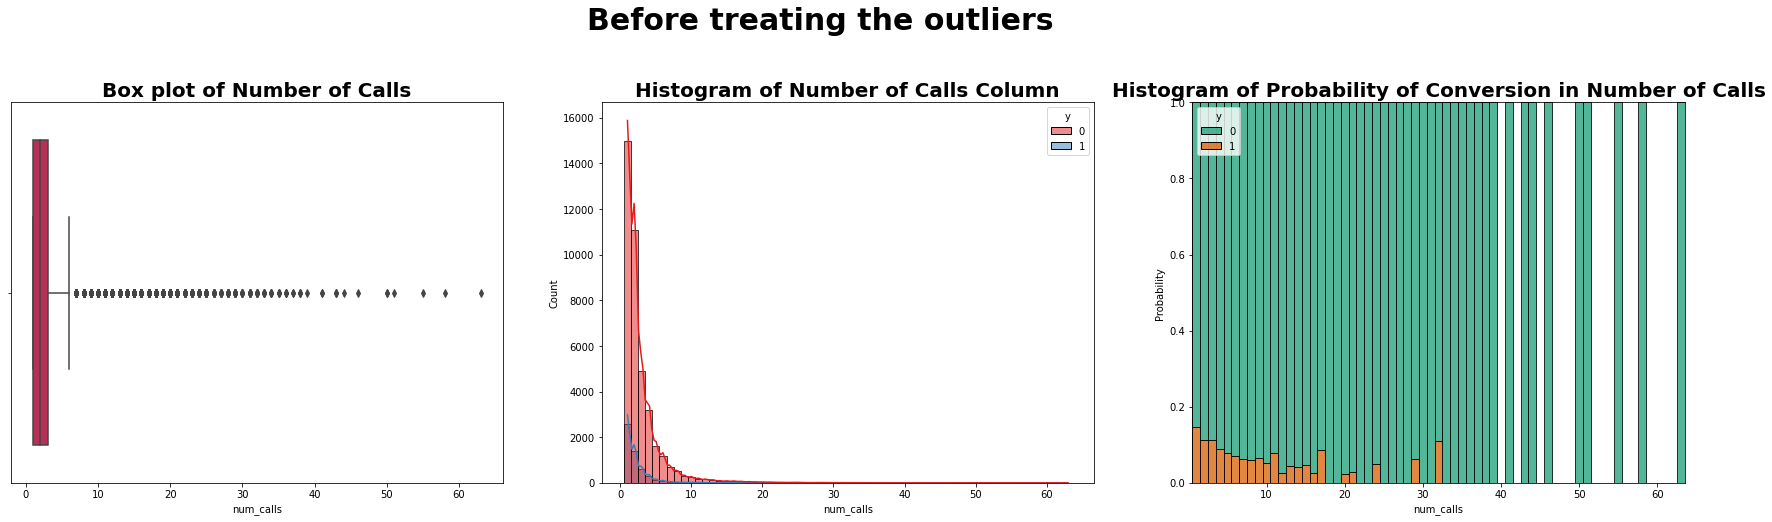

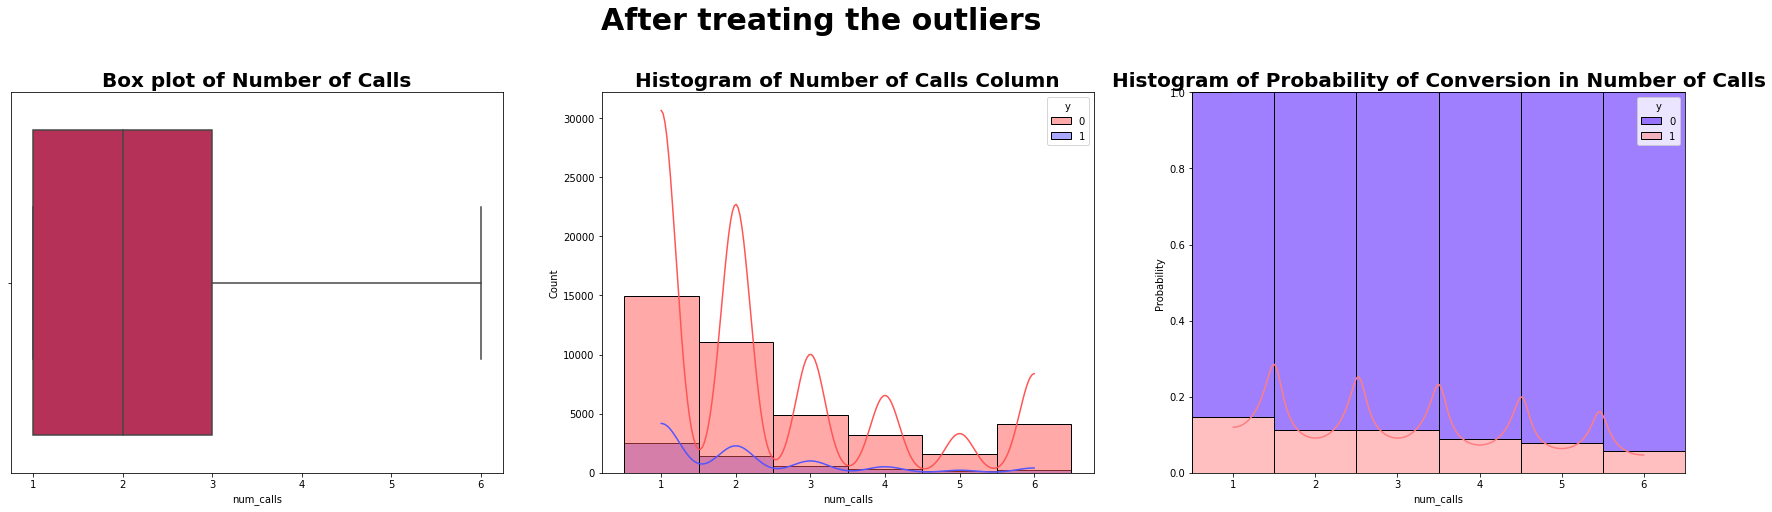

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(30,7))

plt.suptitle("Before treating the outliers",y=1.07,fontweight='heavy',fontsize=30)

sns.boxplot(data=data,x='num_calls',palette='rocket',ax=axes[0]).set_title("Box plot of Number of Calls",fontweight='bold',fontsize=20)
sns.histplot(data=data,x=data['num_calls'],hue='y',palette='Set1',binwidth=3,kde=True,ax=axes[1],discrete=True).set_title("Histogram of Number of Calls Column",fontweight='bold',fontsize=20)
sns.histplot(data=data,x=data['num_calls'],hue='y',palette='Dark2',binwidth=3,kde=False,ax=axes[2],multiple='fill',stat='probability',discrete=True).set_title("Histogram of Probability of Conversion in Number of Calls",fontweight='bold',fontsize=20 )

data['num_calls'] = data['num_calls'].clip(-2,6) # Clipping the outliers

fig2,axes2=plt.subplots(1,3,figsize=(30,7))
plt.suptitle("After treating the outliers",y=1.05,fontweight='heavy',fontsize=30)
sns.boxplot(data=data,x='num_calls',palette='rocket',ax=axes2[0]).set_title("Box plot of Number of Calls",fontweight='bold',fontsize=20)
sns.histplot(data=data,x=data['num_calls'],hue='y',palette='seismic_r',binwidth=1,kde=True,ax=axes2[1],discrete=True).set_title("Histogram of Number of Calls Column",fontweight='bold',fontsize=20)
sns.histplot(data=data,x=data['num_calls'],hue='y',palette='gnuplot2',binwidth=1,kde=True,ax=axes2[2],multiple='fill',stat='probability',discrete=True).set_title("Histogram of Probability of Conversion in Number of Calls",fontweight='bold',fontsize=20)



## **Methods to Plot**

In [ ]:
# data = a DataFrame
# cat_cols = list of categorical column names in the DataFrame 'data'
# cont_cols = list of continuous column names in the DataFrame 'data'

from itertools import combinations
from numpy import random

cat_cols=['job','marital','education_qual','call_type','mon','prev_outcome']
target='y'

def categorical_multi_variate_target(data,target,cat_cols):

  two_cat_combis=list(combinations(cat_cols,2))
  palette=['crest','crest_r','cubehelix','cubehelix_r','flare','afmhot','autumn_r',
           'flare_r','gist_earth','gist_earth_r','gist_heat','gist_heat_r','afmhot_r', 
           'gist_ncar','gist_ncar_r','gist_rainbow','gist_rainbow_r','gist_stern','CMRmap',
           'gist_stern_r','gnuplot','viridis','rocket','magma','mako','flare','autumn','icefire', 
           'gnuplot_r','seismic_r','crest','vlag','cividis','icefire','Spectral',
           'coolwarm','Set1','Set1_r','Set2','Set2_r','Set3','Set3_r','Spectral_r']

  for x in two_cat_combis:

    num=random.randint(len(palette))
    
    table=data.pivot_table(index=x[0],columns=x[1],values=target)
    table=table.apply(lambda x : x*100)

    plt.figure(figsize=(17,8))
    fig=sns.heatmap(data=table,annot=True,cmap=palette[num],cbar_kws={'label':"Percentage of Conversion"}).figure.axes[-1].yaxis.label.set_size(20)

    title_string="Heatmap showing Rate of Conversion with {} & {} in percentages"
    plt.title(title_string.format(x[0],x[1]),fontsize=20,fontweight='bold',pad=25)
   
    plt.xlabel(x[1],fontsize=15,fontweight='bold',labelpad=5)
    plt.xticks(fontsize=13,rotation=45,ha='right')[1:-1]
    plt.ylabel(x[0],fontsize=15,fontweight='bold',labelpad=20)
    plt.yticks(fontsize=13)

In [ ]:
# from itertools import combinations

# cat_cols=['job','marital','education_qual','call_type','mon','prev_outcome']
# two=list(combinations(cat_cols,2))
# xx=two[0]
# xx[1]
# title_string="Heatmap showing Rate of Conversion with various {} & {} in percentages "
# print(title_string.format(xx[0],xx[1]))

In [ ]:
def categorical_Bi_variate_target(data,target,cat_cols):

  colours=['Accent','Accent_r','BrBG','BrBG_r','PRGn','PRGn_r','PiYG','PiYG_r','PuBu','PuBuGn',
           'PuBuGn_r','PuBu_r','PuOr','PuOr_r','RdBu','RdBu_r','RdGy','RdGy_r', 'RdPu','RdPu_r',
           'RdYlBu','RdYlBu_r','RdYlGn','RdYlGn_r','Spectral','Accent','Dark2','Paired','Pastel1','Pastel2','Set1','Set2','Set3']

  for x in  cat_cols:

    num=random.randint(len(colours))

    table=pd.pivot_table(data=data,values='y',index=x).sort_values(by='y')
    table['y']=table['y']*100 

    fig,axes=plt.subplots(1,2,figsize=(15,7))
    title="Percentage of Conversion in {} "
    plt.suptitle(title.format(x),fontweight='bold',fontsize=20)

    table.plot(kind='barh',ax=axes[0],legend=None,cmap=colours[num])
    table.plot(kind='pie',subplots=True,ax=axes[1],cmap=colours[num])
    plt.legend(loc='upper right',bbox_to_anchor=(1.7,0.9),title='Percentage')



In [ ]:
cat_cols=['job','marital','education_qual','call_type','mon','prev_outcome']
target='y'

def categorical_Bi_variate_heatmap(data,target,cat_cols):
  colours=['Accent','Accent_r','BrBG','BrBG_r','PRGn','PRGn_r','PiYG','PiYG_r','PuBu','PuBuGn','rainbow','rocket','viridis','CMRmap',
           'PuBuGn_r','PuBu_r','PuOr','PuOr_r','RdBu','RdBu_r','RdGy','RdGy_r', 'RdPu','RdPu_r','magma','mako','flare','icefire',
           'RdYlBu','RdYlBu_r','RdYlGn','RdYlGn_r','Spectral','Accent','Dark2','Paired','Pastel1','Pastel2','Set1','Set2','Set3']

  for x in cat_cols:

    num=random.randint(len(colours))

    table=pd.pivot_table(data=data,values='y',index=x)
    table['y']=table['y']*100 

    plt.figure(figsize=(15,7))
    sns.heatmap(data=table,annot=True,cmap=colours[num],cbar_kws={'label':"Percentage of Conversion"}).figure.axes[-1].yaxis.label.set_size(15)
    plt.title("Heatmap showing Rate of Conversion in {} in Percentages".format(x),fontsize=20,fontweight='bold',pad=25)
    plt.xlabel("Percentage",fontsize=12,fontweight='bold',color='green')
    plt.ylabel(x,fontsize=12,labelpad=20,fontweight='bold',color='green')
    plt.xticks([])


In [ ]:
def categorical_uni_variation(data,target,cat_cols):

  palette=['crest','crest_r','cubehelix','cubehelix_r','flare','afmhot','autumn_r',
           'flare_r','gist_earth','gist_earth_r','gist_heat','gist_heat_r','afmhot_r', 
           'gist_ncar','gist_ncar_r','gist_rainbow','gist_rainbow_r','gist_stern','CMRmap',
           'gist_stern_r','gnuplot','viridis','rocket','magma','mako','flare','autumn','icefire', 
           'gnuplot_r','seismic_r','crest','vlag','cividis','icefire','Spectral',
           'coolwarm','Set1','Set1_r','Set2','Set2_r','Set3','Set3_r','Spectral_r']         

  for x in cat_cols:

    num=random.randint(len(palette))

    plt.figure(figsize=(13,6))
    sns.countplot(data=data,x=x,hue=target,palette=palette[num])
    plt.xlabel(x,fontsize=12,labelpad=20,fontweight='bold')

In [ ]:
from itertools import combinations

cont_cols=['age','dur','day','num_calls']

two_cont_combis=list(combinations(cont_cols,2))
two_cont_combis

[('age', 'dur'),
 ('age', 'day'),
 ('age', 'num_calls'),
 ('dur', 'day'),
 ('dur', 'num_calls'),
 ('day', 'num_calls')]

## Uni-Variate Analysis in Categorical Coulmns

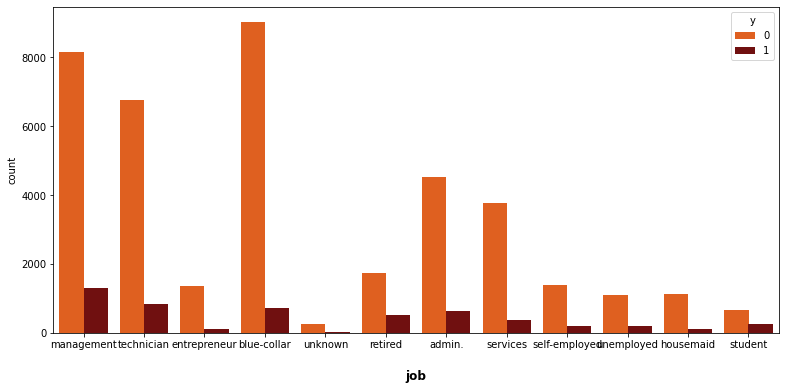

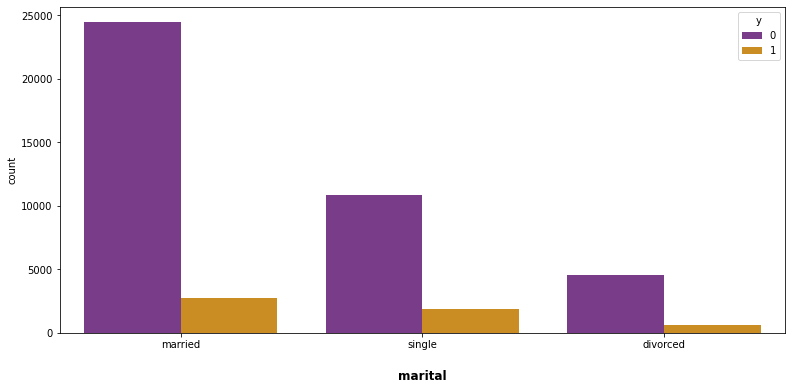

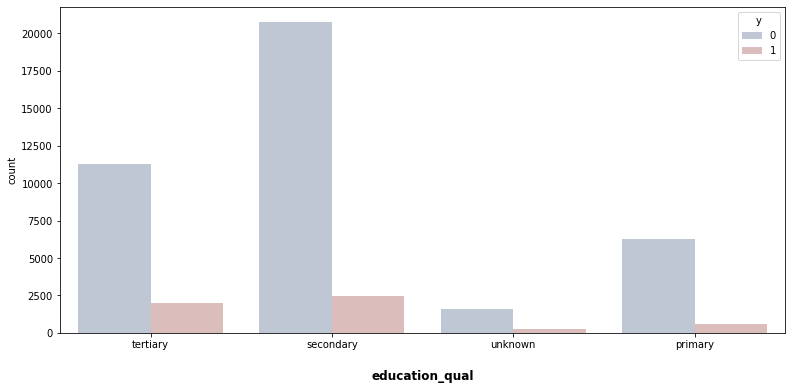

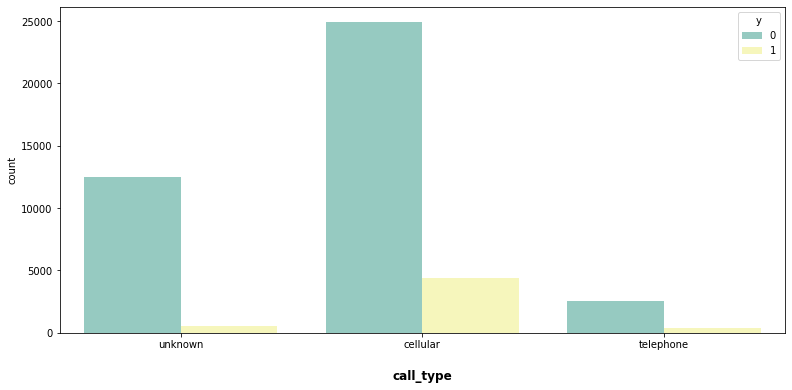

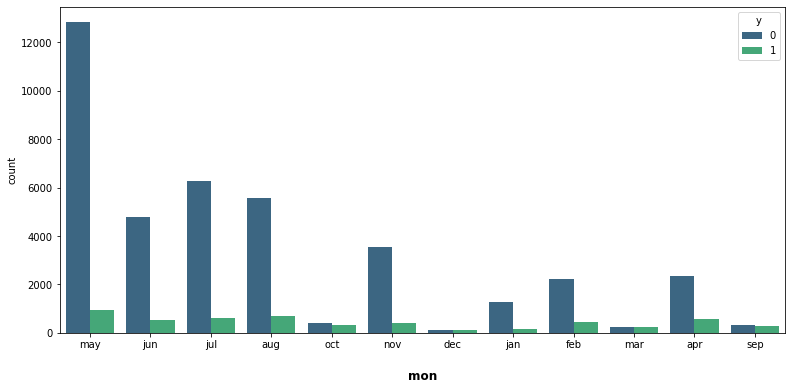

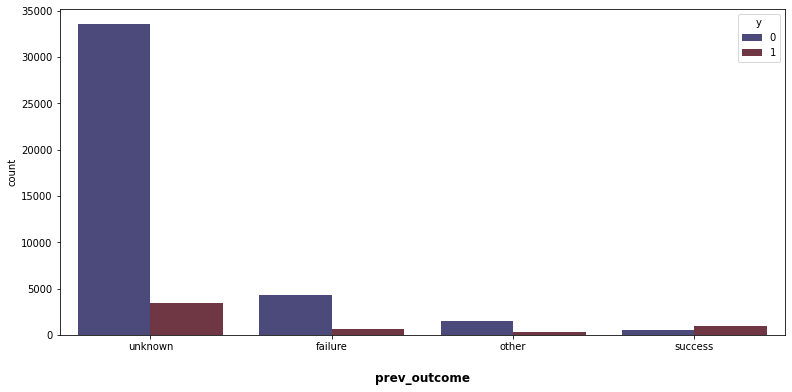

In [ ]:
categorical_uni_variation(data,target,cat_cols)


## Bi-Variate Analysis in Categorical Columns

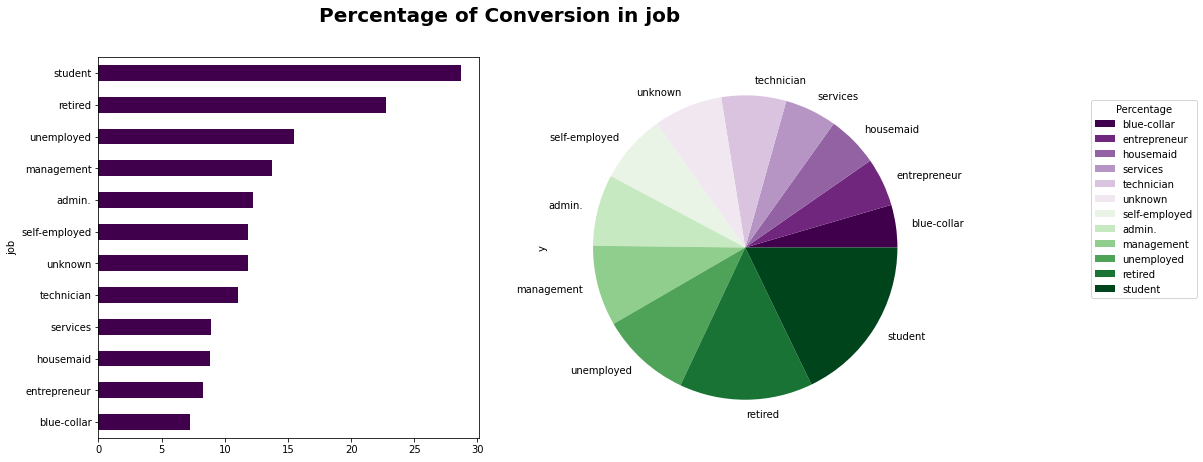

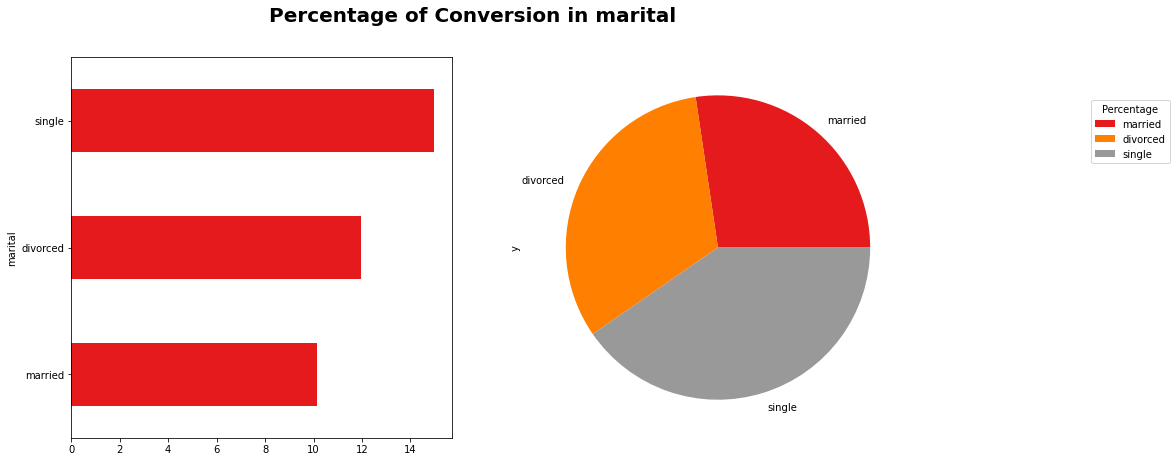

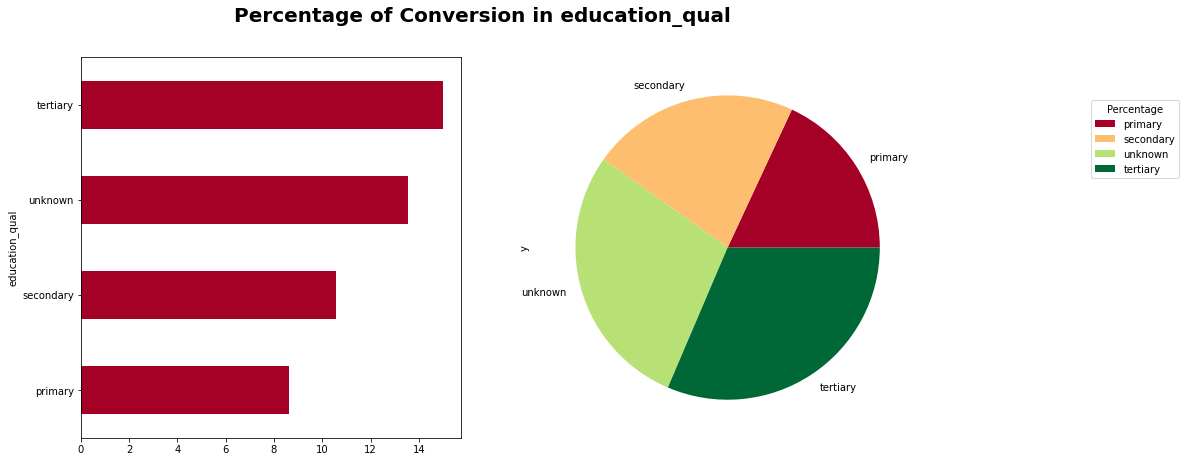

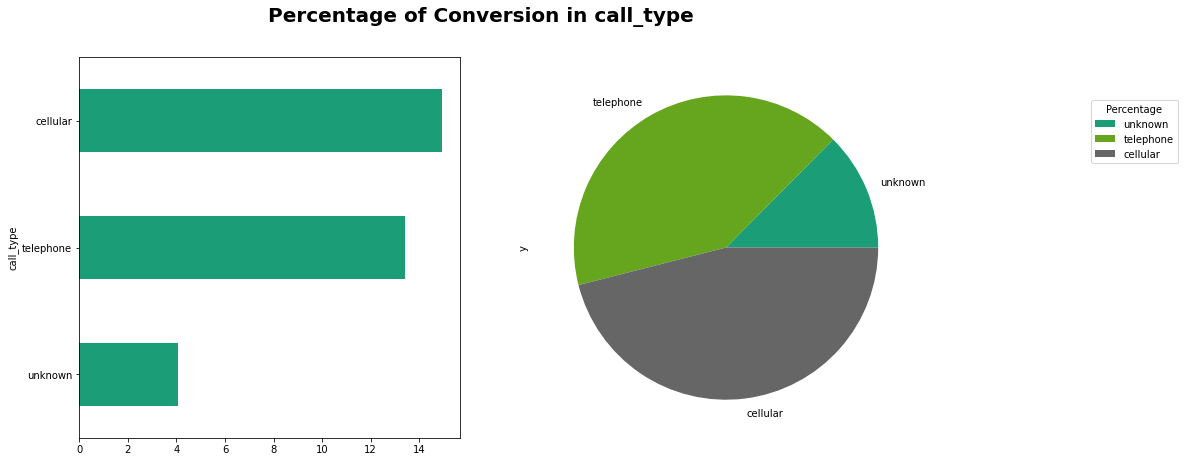

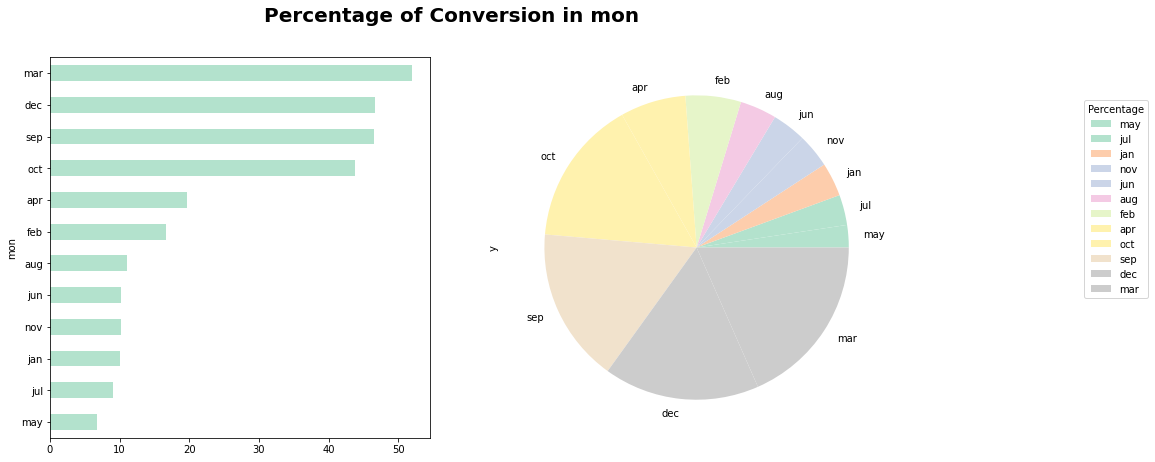

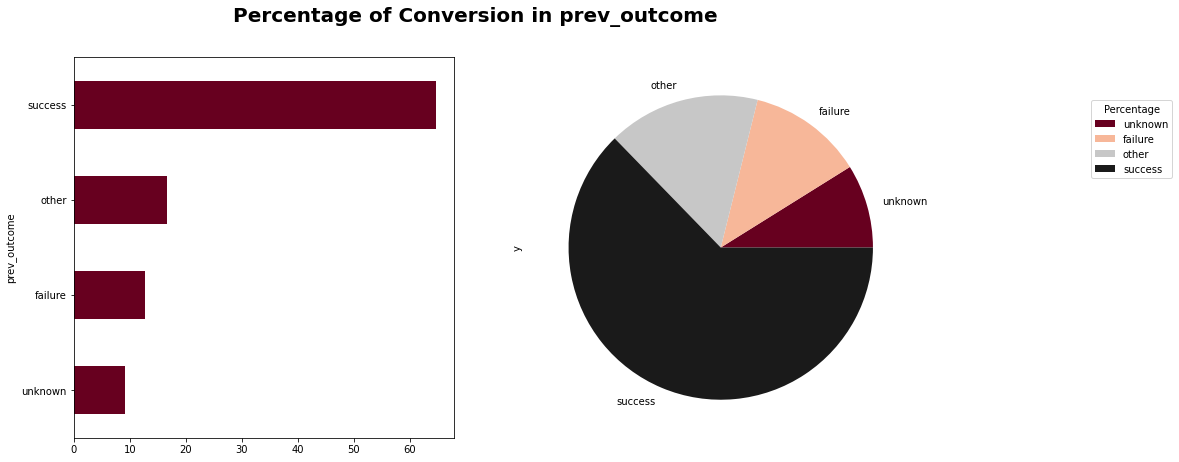

In [ ]:
categorical_Bi_variate_target(data,target,cat_cols)


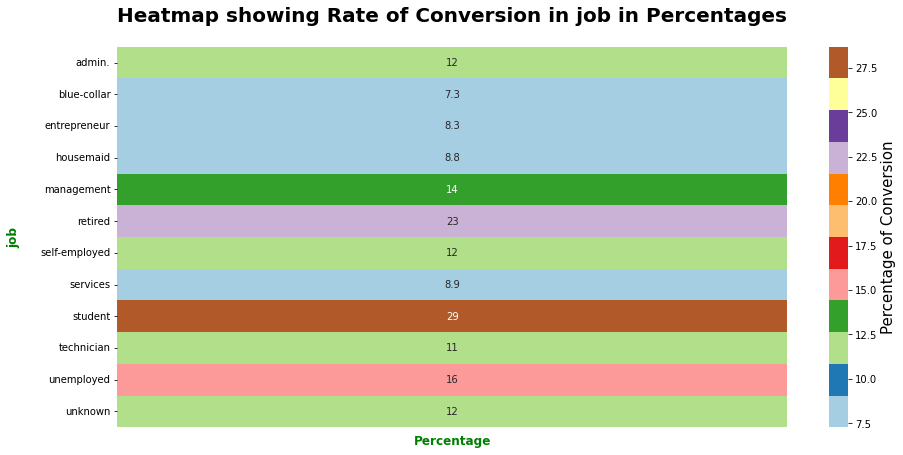

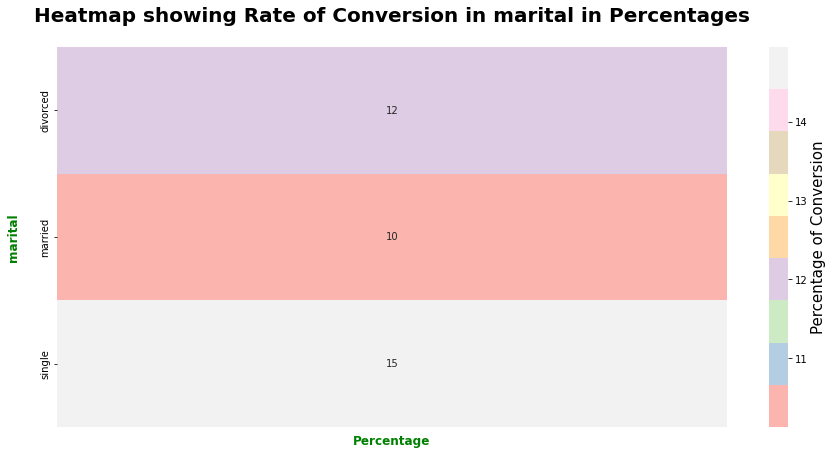

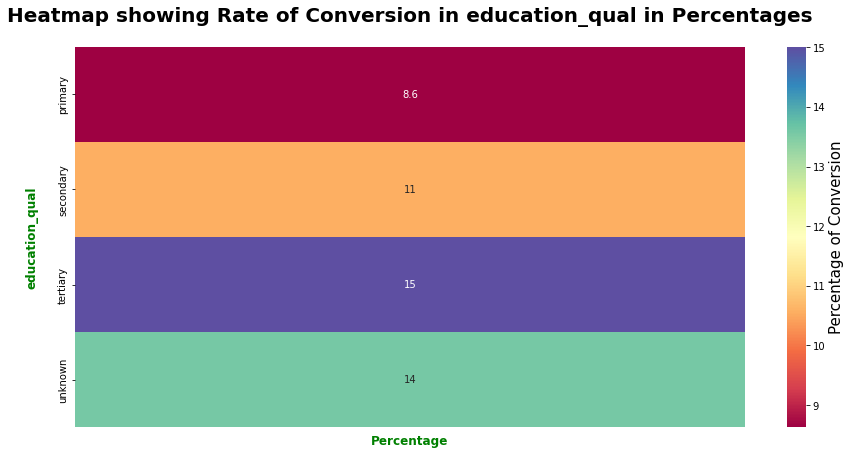

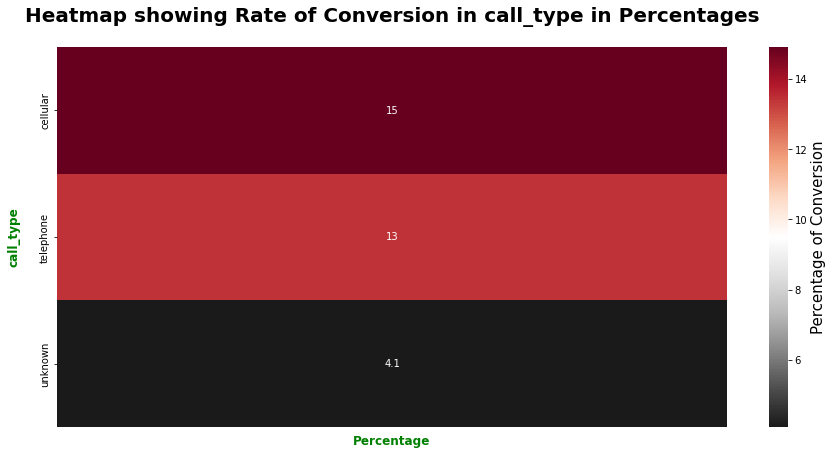

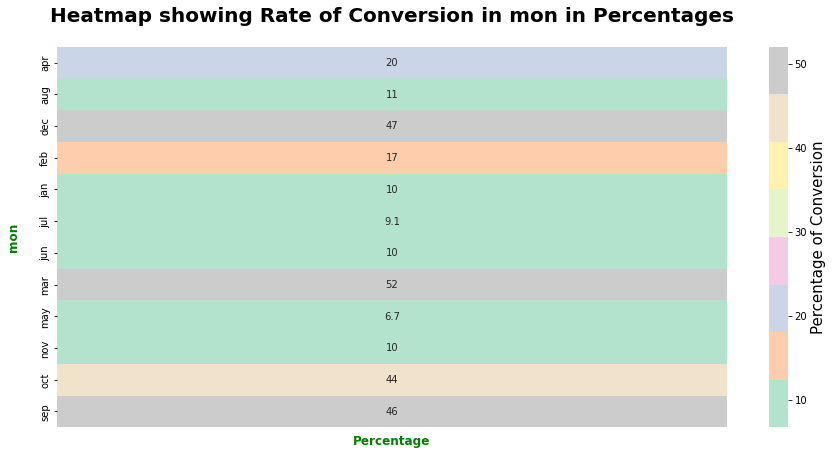

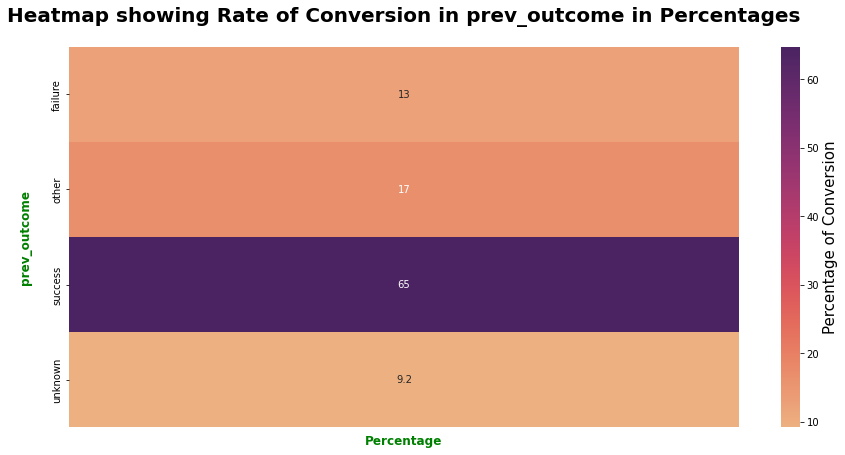

In [ ]:
categorical_Bi_variate_heatmap(data,target,cat_cols)


## Multi-Variate Analysis in Categorical Columns

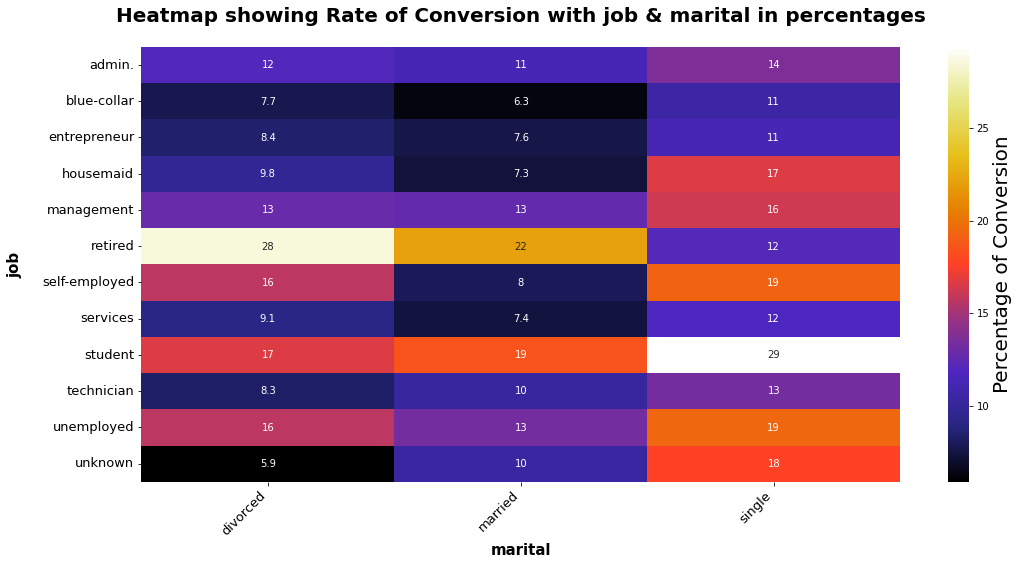

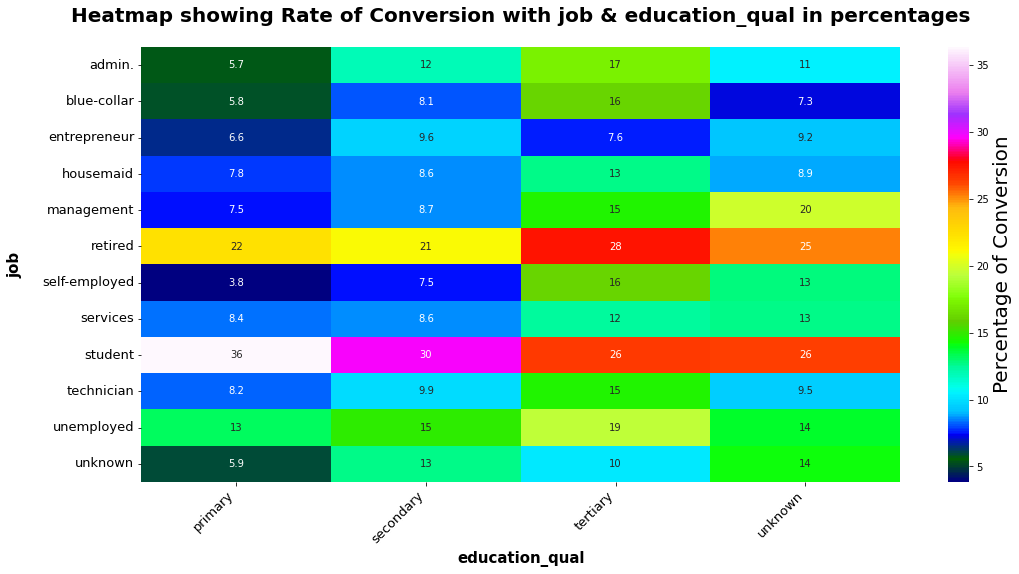

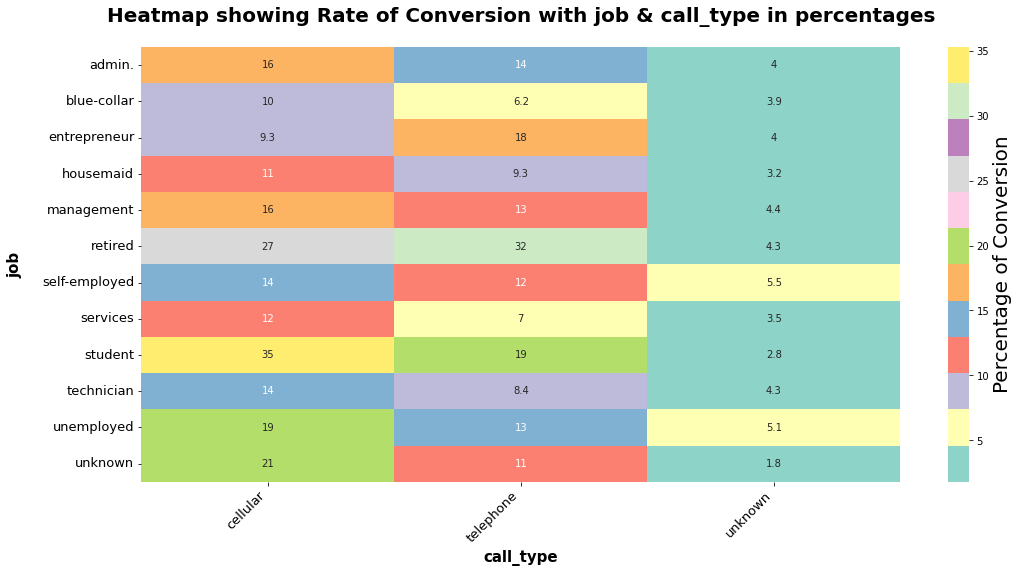

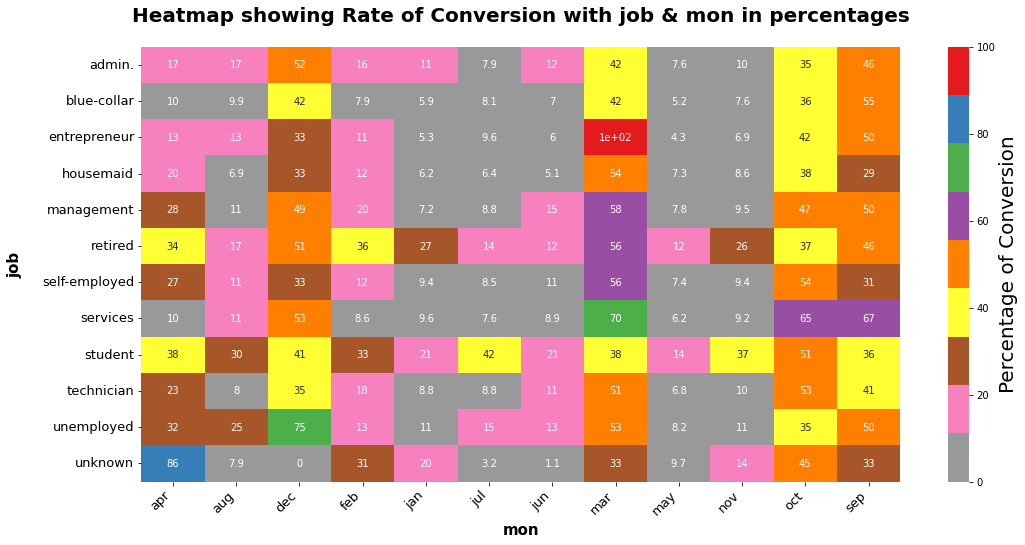

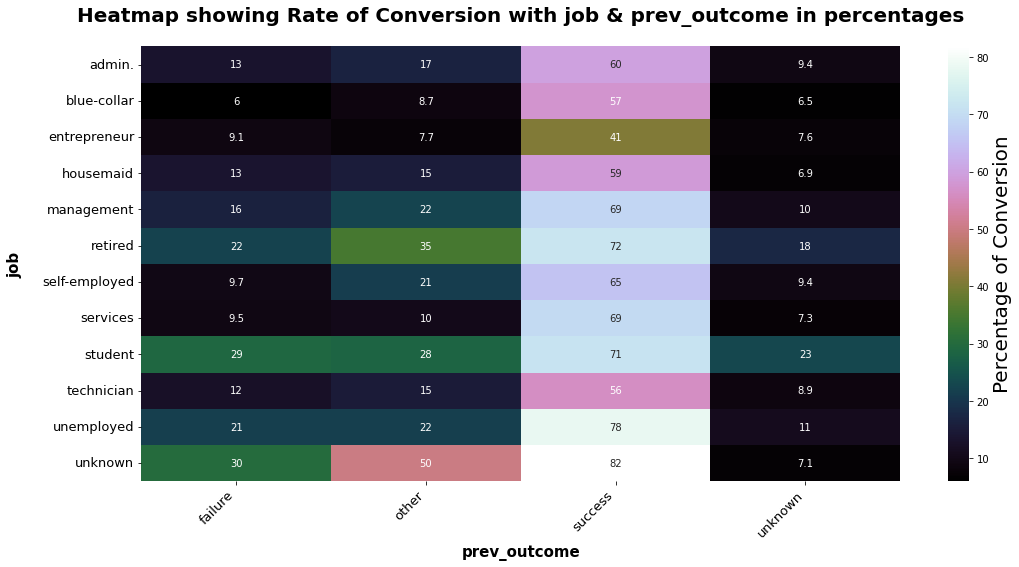

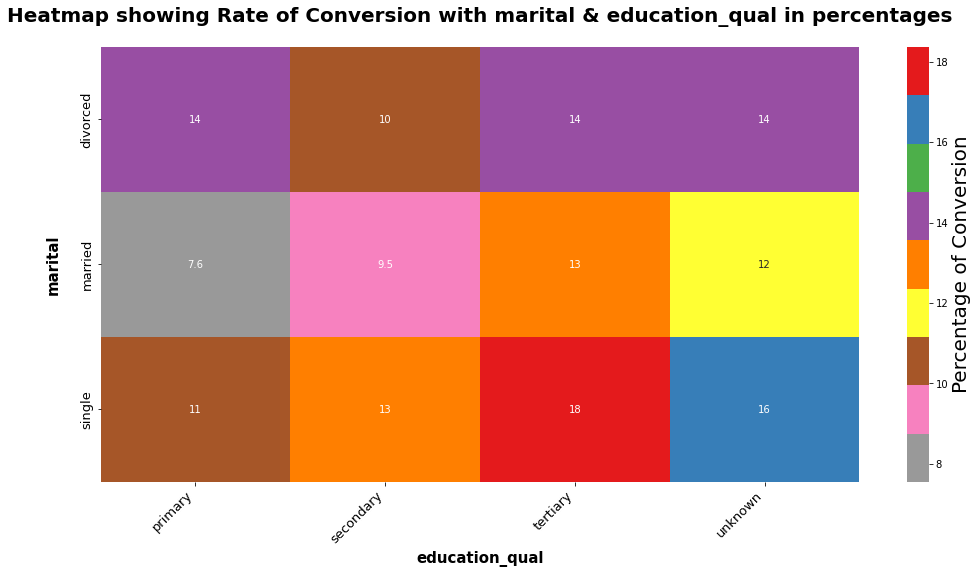

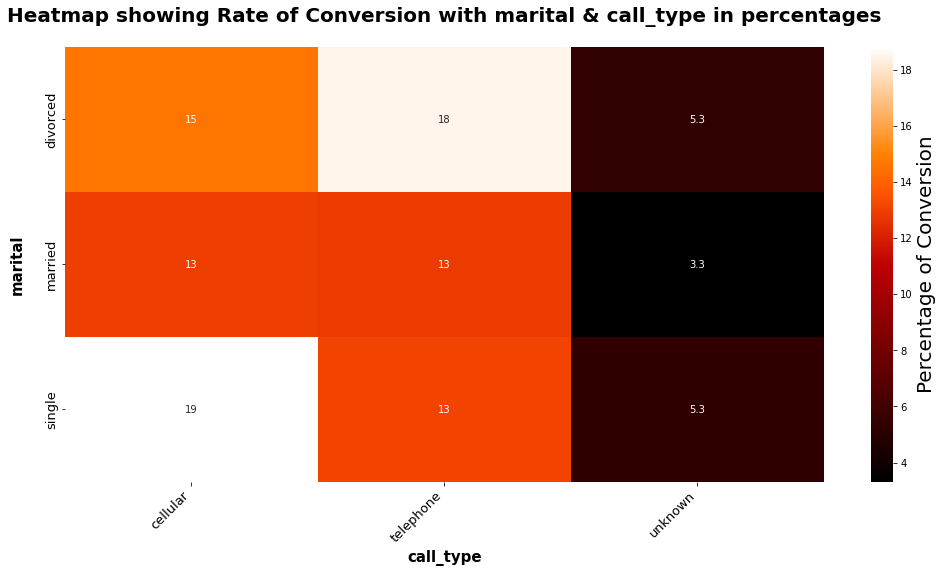

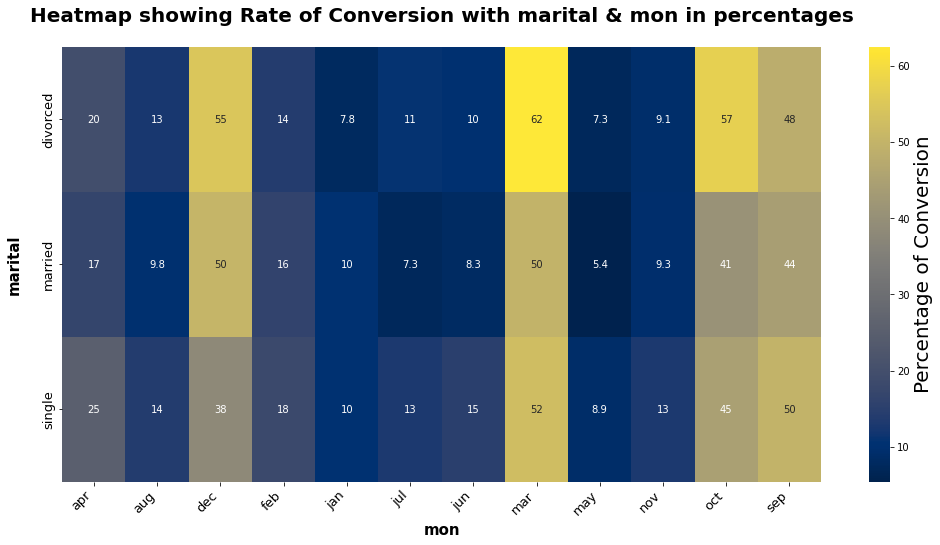

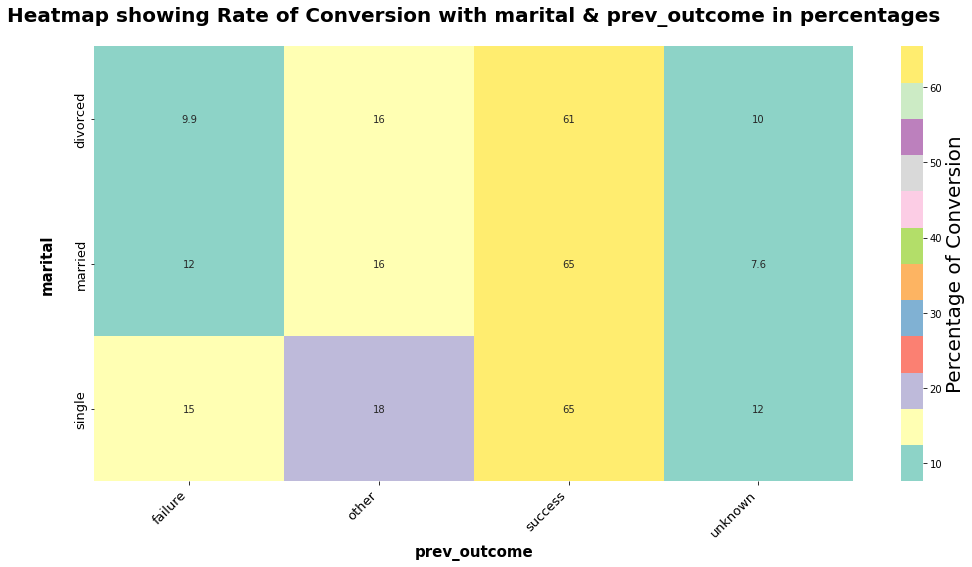

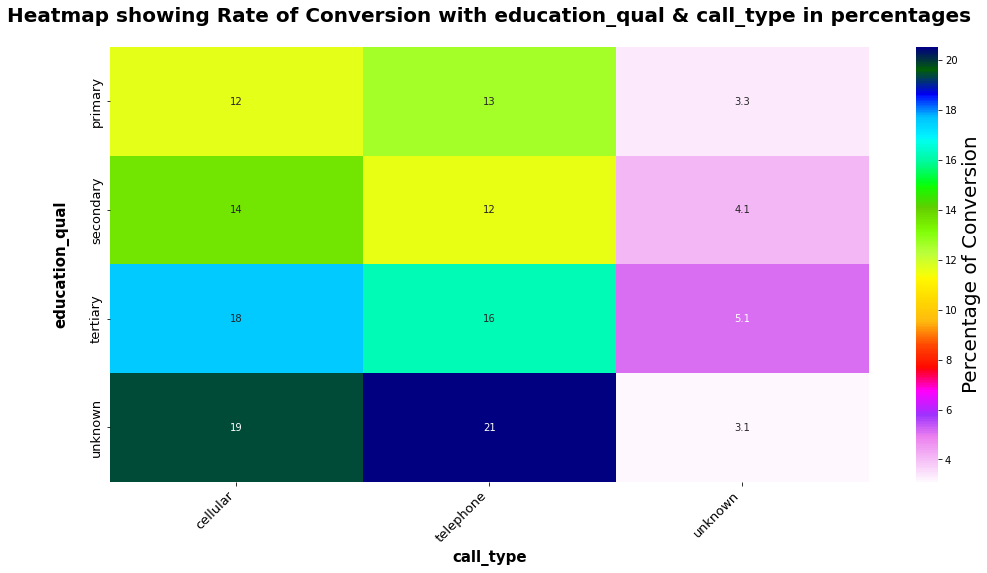

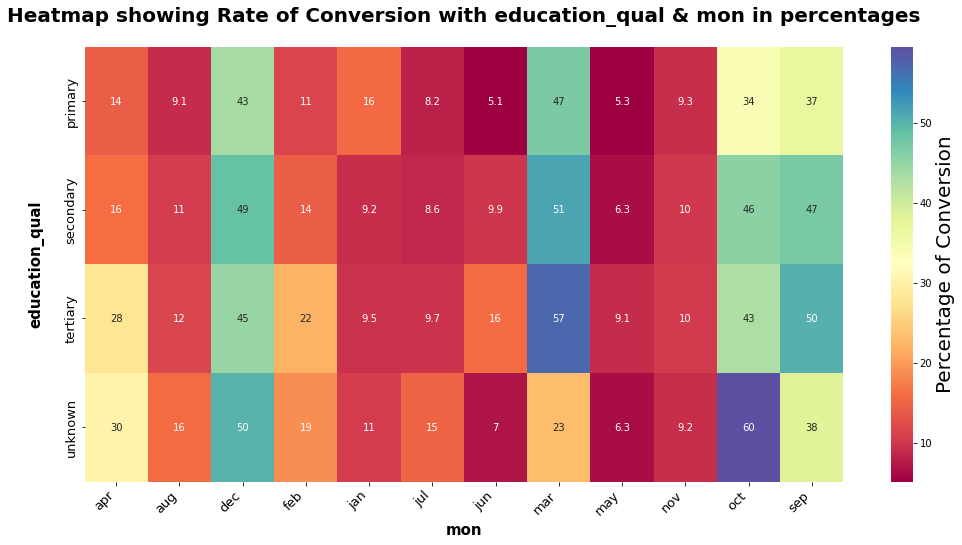

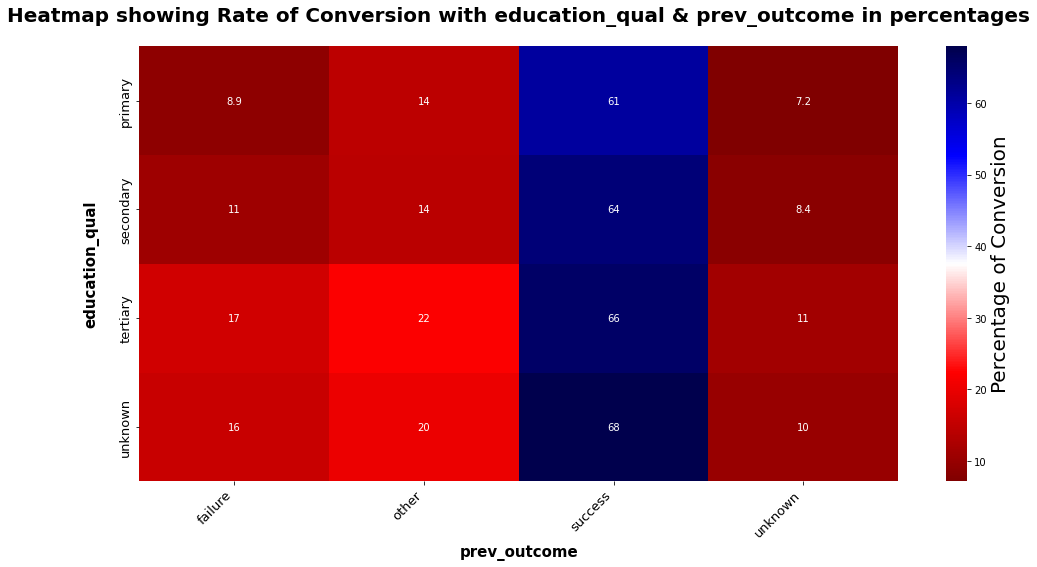

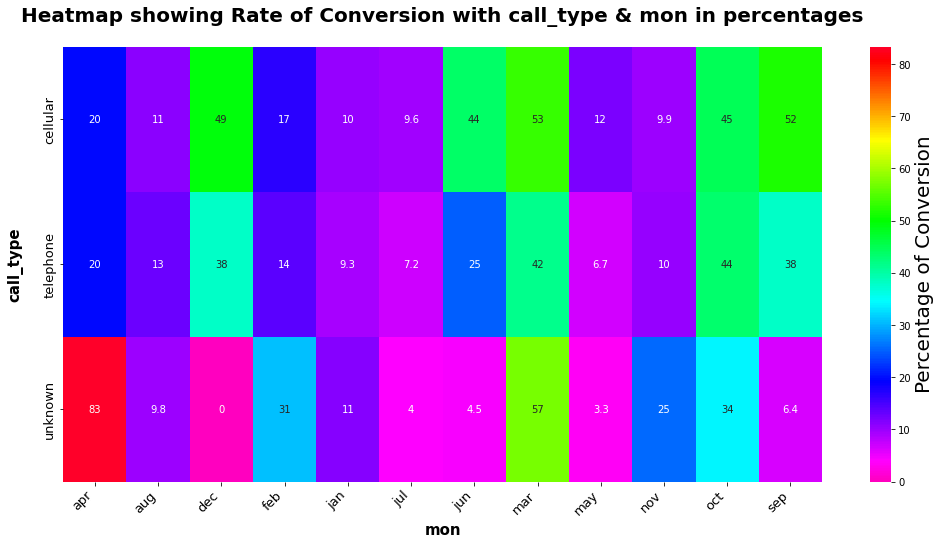

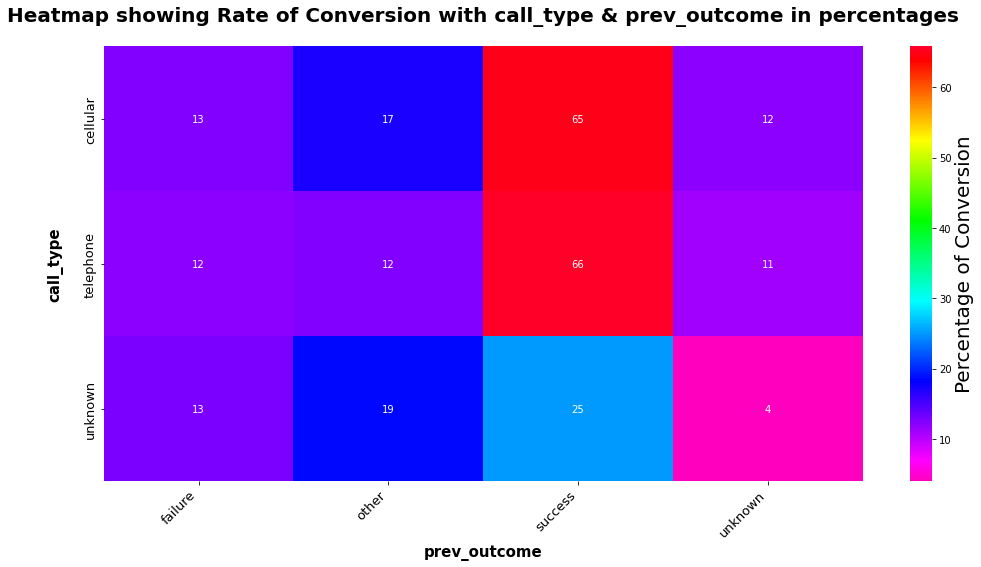

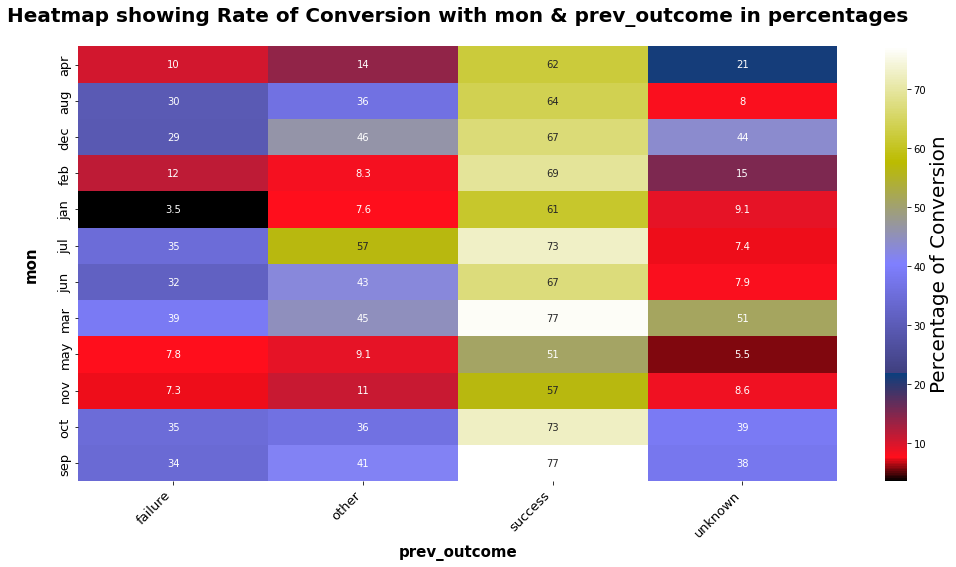

In [ ]:
categorical_multi_variate_target(data,target,cat_cols)


## Multi-Variate analysis in Continuous coulumns

In [ ]:
# data = a DataFrame
# cat_cols = list of categorical column names in the DataFrame 'data'
# cont_cols = list of continuous column names in the DataFrame 'data'

from itertools import combinations
from numpy import random

cat_cols=['y','job','marital','education_qual','call_type','mon','prev_outcome']
cont_cols=['age','dur','day','num_calls']
two_cont_combis=list(combinations(cont_cols,2))

palette=['crest','crest_r','cubehelix','cubehelix_r','flare','afmhot','autumn_r',
           'flare_r','gist_earth','gist_earth_r','gist_heat','gist_heat_r','afmhot_r', 
           'gist_ncar','gist_ncar_r','gist_rainbow','gist_rainbow_r','gist_stern','CMRmap',
           'gist_stern_r','gnuplot','viridis','rocket','magma','mako','flare','autumn','icefire', 
           'gnuplot_r','seismic_r','crest','vlag','cividis','icefire','Spectral',
           'coolwarm','Set1','Set1_r','Set2','Set2_r','Set3','Set3_r','Spectral_r']

for category in cat_cols:
  for combo in two_cont_combis:
    num=np.random.randint(len(palette))
    figure=sns.jointplot(data=data,x=combo[0],y=combo[1],kind='kde',hue=category,shade=True,height=9,palette=palette[num])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
two_cont_combis=list(combinations(cont_cols,2))
two_cont_combis

[('age', 'dur'),
 ('age', 'day'),
 ('age', 'num_calls'),
 ('dur', 'day'),
 ('dur', 'num_calls'),
 ('day', 'num_calls')]

# **Encoding**

## Job column




In [ ]:
data.job.value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
data['job']=data.job.map({'blue-collar':0,'entrepreneur':1,'housemaid':2,'services':3,'technician':4,'unknown':5,'self-employed':6,'admin.':7,'management':8,'unemployed':9,'retired':10,'student':11})

## Marital column

In [ ]:
data['marital']=data.marital.map({'married':0,'divorced':1,'single':2})

## Education Qualification

In [ ]:
data['education_qual']=data.education_qual.map({'primary':0,'secondary':1,'unknown':2,'tertiary':3})

## Call type

In [ ]:
data['call_type']=data.call_type.map({'unknown':0,'telephone':1,'cellular':2})

## Month column

In [ ]:
data['mon']=data.mon.map({'may':0,'jul':1,'jan':2,'nov':3,'jun':4,'aug':5,'feb':6,'apr':7,'oct':8,'sep':9,'dec':10,'mar':11})

## Previous outcome

In [ ]:
data['prev_outcome']=data.prev_outcome.map({'unknown':0,'failure':1,'other':2,'success':3})
data['prev_outcome']

0        0
1        0
2        0
3        0
4        0
        ..
45206    0
45207    0
45208    3
45209    0
45210    2
Name: prev_outcome, Length: 45205, dtype: int64

## **Splitting & Balancing**

Splitting

In [ ]:
from sklearn.model_selection import train_test_split

features=['age','education_qual','day','dur','num_calls','job','marital','mon','prev_outcome','call_type']
target=['y']

x=data[features]
y=data[target]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [ ]:
x_train.shape

(36164, 10)

In [ ]:
y_train.shape

(36164, 1)

Balancing

In [ ]:
from imblearn.combine import SMOTEENN

smt=SMOTEENN(sampling_strategy="all")
x_train_smt,y_train_smt=smt.fit_resample(x_train,y_train)

In [ ]:
x_train_smt.shape

(54792, 10)

In [ ]:
y_train_smt.shape

(54792, 1)

# **Model**

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression()
log_reg.fit(x_train_smt,y_train_smt)

y_pred=log_reg.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred


array([0, 1, 1, ..., 0, 0, 1])

In [ ]:
log_reg.predict_proba(x_test) # Predcting the probabilities of x_test


array([[0.83687195, 0.16312805],
       [0.00333312, 0.99666688],
       [0.44579557, 0.55420443],
       ...,
       [0.86462023, 0.13537977],
       [0.99831696, 0.00168304],
       [0.23039412, 0.76960588]])

In [ ]:
log_reg.coef_

array([[-0.03289889,  0.041736  , -0.01828623,  0.01198381, -0.58973372,
         0.15220082, -0.28543492,  0.39043318,  1.02059492, -0.05481011]])

In [ ]:
log_reg.intercept_

array([-2.48691519])

Evaluation Metric

Accuracy: 0.7391881429045459 	F1 Score: 0.4348034515819751 	AUROC Score: 0.8841145464386782 
Confusion Matrix:  [[5776 2234]
 [ 124  907]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


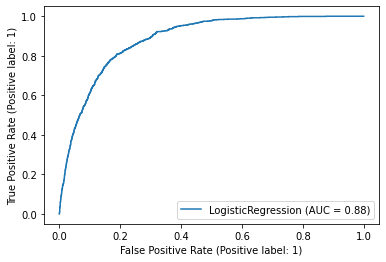

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,confusion_matrix,plot_roc_curve

score_Acc = accuracy_score(y_test,y_pred)
score_F1 = f1_score(y_test,y_pred)
score_AUROC=roc_auc_score(y_test,log_reg.predict_proba(x_test)[:,1])
cm = confusion_matrix(y_test,y_pred)

print("Accuracy:",score_Acc,"\tF1 Score:",score_F1,"\tAUROC Score:",score_AUROC,"\nConfusion Matrix: ",cm)
roc_Curve = plot_roc_curve(log_reg,x_test,y_test)


## KNN

Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train_smt_scaled=scaler.transform(x_train_smt)
x_test_scaled=scaler.transform(x_test)

Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

y_train_smt_array = y_train_smt.values.ravel() # to convert into a 1d array

# Finding the best values of K (Hyper Parametre Tuning)
Training_Score=[]
Cross_Val_Score=[]
K=[]
for i in [1,2,3,4,5,6,7,8,9,10,15,20,30,40,50,60,70]:
  knn = KNeighborsClassifier(i)
  knn.fit(x_train_smt_scaled,y_train_smt_array)

  Train_score = knn.score(x_train_smt_scaled,y_train_smt_array)
  CV_score = np.mean(cross_val_score(knn,x_train_smt_scaled,y_train_smt_array,cv=10,scoring="roc_auc"))

  K.append(i)
  Training_Score.append(Train_score)
  Cross_Val_Score.append(CV_score)

  print("k-value:",i,"\tTrain Score:",Train_score,"\tCV score:",CV_score)

k-value: 1 	Train Score: 1.0 	CV score: 0.9432268440058073
k-value: 2 	Train Score: 0.9846692947875603 	CV score: 0.9606352401598212
k-value: 3 	Train Score: 0.967969776609724 	CV score: 0.9671067474290796
k-value: 4 	Train Score: 0.9647028763323113 	CV score: 0.9704275399611147
k-value: 5 	Train Score: 0.9563257409840853 	CV score: 0.9724282327021656
k-value: 6 	Train Score: 0.9546831654256096 	CV score: 0.9738061637741515
k-value: 7 	Train Score: 0.9489341509709447 	CV score: 0.9748268788480297
k-value: 8 	Train Score: 0.9482041173893999 	CV score: 0.9752121871179797
k-value: 9 	Train Score: 0.9449372171119872 	CV score: 0.97561097978255
k-value: 10 	Train Score: 0.9443349394072127 	CV score: 0.9758398903227028
k-value: 15 	Train Score: 0.936523580084684 	CV score: 0.9755142922542693
k-value: 20 	Train Score: 0.9317418601255658 	CV score: 0.9749132537963712
k-value: 30 	Train Score: 0.9257190830778216 	CV score: 0.9737959769181185
k-value: 40 	Train Score: 0.9212841290699372 	CV scor

In [ ]:
k=pd.Series(K)
accuracy=pd.Series(Training_Score)
auroc=pd.Series(Cross_Val_Score)
dictionary={"K-value":k,"Accuracy":accuracy,"AUROC":auroc}
hyper_param_Tuning=pd.DataFrame(dictionary)
hyper_param_Tuning

,K-value,Accuracy,AUROC
0,1,1.000000,0.943227
1,2,0.984669,0.960635
2,3,0.967970,0.967107
3,4,0.964703,0.970428
4,5,0.956326,0.972428
5,6,0.954683,0.973806
6,7,0.948934,0.974827
7,8,0.948204,0.975212
8,9,0.944937,0.975611
9,10,0.944335,0.975840


In [ ]:
hyper_param_Tuning['AUROC'].max()

0.9758398903227028

In [ ]:
hyper_param_Tuning.query('AUROC==0.9758398903227028')

,K-value,Accuracy,AUROC
9,10,0.944335,0.97584


Training the model on the best value of 'k'

In [ ]:
# Training the model on the best value of 'k'

knn=KNeighborsClassifier(10)
knn.fit(x_train_smt_scaled,y_train_smt_array)

3.
+3
y_predicted=knn.predict(x_test_scaled)
y_predicted


array([0, 1, 1, ..., 0, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score, plot_roc_curve, confusion_matrix, f1_score,roc_auc_score

score_Acc_knn = accuracy_score(y_test,y_predicted)
score_F1_knn = f1_score(y_test,y_predicted)
score_AUROC_knn=roc_auc_score(y_test,y_predicted)
cm_knn = confusion_matrix(y_test,y_predicted)

# roc_Curve = plot_roc_curve(knn,x_test,y_test)

print("Accuracy:",score_Acc_knn,"\tF1 Score:",score_F1_knn,"\tAUROC Score:",score_AUROC_knn,"\nConfusion Matrix: ",cm_knn)


Accuracy: 0.8000221214467426 	F1 Score: 0.4963788300835655 	AUROC Score: 0.8279849024800474 
Confusion Matrix:  [[6342 1668]
 [ 140  891]]


In [ ]:
from sklearn.model_selection import cross_val_score

x_train_smt_scaled,y_train_smt_array

x = x_train_smt_scaled
y = y_train_smt_array

for k in [1,2,3,4,5,6,7,8,9,10,13,20,40,80]:
  clf = KNeighborsClassifier(n_neighbors=k)
  clf.fit(x,y)
  print("K value : ", k, " train score : ", clf.score(x,y) , " test score : ", cross_val_score(clf,x,y,cv = 5, scoring = 'accuracy').mean())

K value :  1  train score :  1.0  test score :  0.9428203141340783
K value :  2  train score :  0.9846692947875603  test score :  0.931431902489561
K value :  3  train score :  0.967969776609724  test score :  0.9378743575937131
K value :  4  train score :  0.9647028763323113  test score :  0.9348995203729457
K value :  5  train score :  0.9563257409840853  test score :  0.934242407875737
K value :  6  train score :  0.9546831654256096  test score :  0.9322895966866896
K value :  7  train score :  0.9489341509709447  test score :  0.9314135227452918
K value :  8  train score :  0.9482041173893999  test score :  0.9303549304155307
K value :  9  train score :  0.9449372171119872  test score :  0.9294423734478581
K value :  10  train score :  0.9443349394072127  test score :  0.928310846708819
K value :  13  train score :  0.9391699518177836  test score :  0.9256827714429336
K value :  20  train score :  0.9317418601255658  test score :  0.9217405794359272
K value :  40  train score :  0.

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train_smt,y_train_smt)
y_pred=dt.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

Accuracy: 0.8252405707333259 	F1 Score: 0.495530012771392 	AUROC Score: 0.793624543036045


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


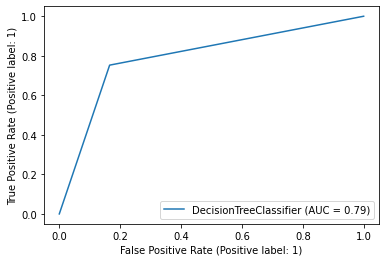

In [ ]:
score_Acc = accuracy_score(y_test,y_pred)
score_F1 = f1_score(y_test,y_pred)
score_AUROC=roc_auc_score(y_test,y_pred)
# cm = confusion_matrix(y_test,y_pred)

print("Accuracy:",score_Acc,"\tF1 Score:",score_F1,"\tAUROC Score:",score_AUROC,)
roc_Curve = plot_roc_curve(dt,x_test,y_test)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve,f1_score
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20,25,30,35,40,45,50,55,60]:
  dt=DecisionTreeClassifier(max_depth=depth) # We are telling the DT to not to grow beyong this threshold
  # Fit dt to training data set
  dt.fit(x_train_smt,y_train_smt) # The model is trained
  trainAccuracy=accuracy_score(y_train_smt,dt.predict(x_train_smt)) 

  dt=DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy=cross_val_score(dt,x_train_smt,y_train_smt,cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.7800226310410279  Cross val score :  0.7800224413587113
Depth  :  2  Training Accuracy :  0.7977624470725654  Cross val score :  0.7977622021973747
Depth  :  3  Training Accuracy :  0.8531902467513506  Cross val score :  0.8527155409573115
Depth  :  4  Training Accuracy :  0.8613666228646518  Cross val score :  0.8608007348562461
Depth  :  5  Training Accuracy :  0.8757482844210833  Cross val score :  0.8730837117967342
Depth  :  6  Training Accuracy :  0.8839611622134618  Cross val score :  0.8833042652569931
Depth  :  7  Training Accuracy :  0.9012994597751497  Cross val score :  0.8992008471629566
Depth  :  8  Training Accuracy :  0.9153161045408089  Cross val score :  0.9113010592534468
Depth  :  9  Training Accuracy :  0.9275806687107607  Cross val score :  0.9201894159917827
Depth  :  10  Training Accuracy :  0.9342969776609724  Cross val score :  0.9236752937226811
Depth  :  20  Training Accuracy :  0.9977368958972113  Cross val score :  0.946

In [ ]:
dt=DecisionTreeClassifier(max_depth=15)
dt.fit(x_train_smt,y_train_smt)
y_pred=dt.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 0, 1])

Accuracy: 0.8221435681893596 	F1 Score: 0.5 	AUROC Score: 0.8037079620406596


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


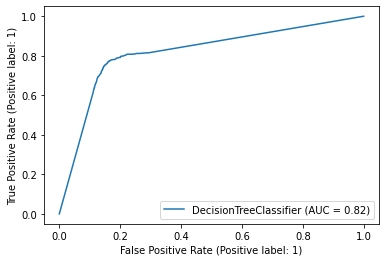

In [ ]:
score_Acc = accuracy_score(y_test,y_pred)
score_F1 = f1_score(y_test,y_pred)
score_AUROC=roc_auc_score(y_test,y_pred)
# cm = confusion_matrix(y_test,y_pred)

print("Accuracy:",score_Acc,"\tF1 Score:",score_F1,"\tAUROC Score:",score_AUROC,)
roc_Curve = plot_roc_curve(dt,x_test,y_test)